<a href="https://colab.research.google.com/github/marti1310/Car_Accidents_Clustering/blob/main/ProjetDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering de données des accidents corporels de la circulation en France en 2023


Source des données : https://www.data.gouv.fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2023

In [ ]:
# Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cellule pour Tamazgha
url = '/content/drive/MyDrive/Projet/Projet/'

In [ ]:
# Cellule pour Martina
#url = 'drive/MyDrive/Colab Notebooks/DataMining/Projet/'

# Caractéristiques

In [ ]:
# Importation des données du tableau Caractéristiques
df_carac = pd.read_csv(url+'caract-2023.csv',sep=';',encoding='utf8', engine='python')

print("caracteristiques:", df_carac.shape)

# Aperçu de 5 premières lignes
print("=== CARACTÉRISTIQUES ===")
display(df_carac.head())

# Infos générales
print("\n--- carac.info() ---")
df_carac.info()

# Statistiques générales sur les variables numériques
print("Statistiques CARACTÉRISTIQUES")
display(df_carac.describe())


caracteristiques: (54822, 15)
=== CARACTÉRISTIQUES ===


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"



--- carac.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  54822 non-null  int64 
 1   jour     54822 non-null  int64 
 2   mois     54822 non-null  int64 
 3   an       54822 non-null  int64 
 4   hrmn     54822 non-null  object
 5   lum      54822 non-null  int64 
 6   dep      54822 non-null  object
 7   com      54822 non-null  object
 8   agg      54822 non-null  int64 
 9   int      54822 non-null  int64 
 10  atm      54822 non-null  int64 
 11  col      54822 non-null  int64 
 12  adr      53433 non-null  object
 13  lat      54822 non-null  object
 14  long     54822 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ MB
Statistiques CARACTÉRISTIQUES


,Num_Acc,jour,mois,an,lum,agg,int,atm,col
count,5.482200e+04,54822.000000,54822.000000,54822.0,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000
mean,2.023000e+11,15.396629,6.744628,2023.0,1.937653,1.626135,2.085167,1.636296,4.034129
std,1.582589e+04,8.705039,3.368853,0.0,1.485124,0.483833,2.022823,1.692539,1.973341
min,2.023000e+11,1.000000,1.000000,2023.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,2.023000e+11,8.000000,4.000000,2023.0,1.000000,1.000000,1.000000,1.000000,3.000000
50%,2.023000e+11,15.000000,7.000000,2023.0,1.000000,2.000000,1.000000,1.000000,3.000000
75%,2.023000e+11,23.000000,10.000000,2023.0,3.000000,2.000000,2.000000,1.000000,6.000000
max,2.023001e+11,31.000000,12.000000,2023.0,5.000000,2.000000,9.000000,9.000000,7.000000


Colonnes importantes du fichier carac-2023

In [ ]:
cols_interet_carac = ["atm", "lum", "agg", "int", "lat", "long"]
for c in cols_interet_carac:
    if c in df_carac.columns:
        print(f"\n--- {c} ---")
        print(df_carac[c].value_counts(dropna=False).head(10))


--- atm ---
atm
 1    42747
 2     6630
 8     2233
 3     1505
 7      954
 5      239
 9      208
 6      185
 4      117
-1        4
Name: count, dtype: int64

--- lum ---
lum
 1    36117
 5     8498
 3     5913
 2     3643
 4      649
-1        2
Name: count, dtype: int64

--- agg ---
agg
2    34326
1    20496
Name: count, dtype: int64

--- int ---
int
 1    34842
 2     6743
 3     6359
 9     2489
 6     2440
 4     1095
 7      415
 5      292
 8      141
-1        6
Name: count, dtype: int64

--- lat ---
lat
48,93788866      12
 -17,58400000    12
 -17,57700000    11
 -17,61800000     9
48,93542176       8
 -16,62000000     8
 -17,69600000     7
 -17,75600000     7
 -17,71200000     7
48,94920532       7
Name: count, dtype: int64

--- long ---
long
 -149,56000000    13
2,29766722        12
 -150,20200000    11
 -149,54900000     9
 -151,49600000     8
2,26058310         8
 -149,50800000     7
2,28069842         7
 -149,54800000     7
 -148,73600000     7
Name: count, dtype: in

Vérification des valeurs manquantes

In [ ]:
print("Valeurs manquantes dans caracteristiques :")
display(df_carac.isna().sum().sort_values(ascending=False).head(10))

Valeurs manquantes dans caracteristiques :


,0
adr,1389
jour,0
Num_Acc,0
an,0
hrmn,0
lum,0
mois,0
dep,0
com,0
int,0


# Lieux

In [ ]:
# Importation des données du tableau Lieux
df_lieux = pd.read_csv(url+'lieux-2023.csv',sep=';',encoding='utf8', engine='python')

print("lieux:", df_lieux.shape)

# Aperçu de 5 premières lignes
print("\n=== LIEUX ===")
display(df_lieux.head())

# Infos générales
print("\n--- lieux.info() ---")
df_lieux.info()

# Statistiques générales sur les variables numériques
print("Statistiques LIEUX")
display(df_lieux.describe())


lieux: (70860, 18)

=== LIEUX ===


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50



--- lieux.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70860 entries, 0 to 70859
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  70860 non-null  int64 
 1   catr     70860 non-null  int64 
 2   voie     58113 non-null  object
 3   v1       70860 non-null  int64 
 4   v2       5884 non-null   object
 5   circ     70860 non-null  int64 
 6   nbv      70860 non-null  object
 7   vosp     70860 non-null  int64 
 8   prof     70860 non-null  int64 
 9   pr       70860 non-null  object
 10  pr1      70860 non-null  object
 11  plan     70860 non-null  int64 
 12  lartpc   31 non-null     object
 13  larrout  70860 non-null  object
 14  surf     70860 non-null  int64 
 15  infra    70860 non-null  int64 
 16  situ     70860 non-null  int64 
 17  vma      70860 non-null  int64 
dtypes: int64(11), object(7)
memory usage: 9.7+ MB
Statistiques LIEUX


,Num_Acc,catr,v1,circ,vosp,prof,plan,surf,infra,situ,vma
count,7.086000e+04,70860.000000,70860.000000,70860.000000,70860.000000,70860.000000,70860.00000,70860.000000,70860.000000,70860.000000,70860.000000
mean,2.023000e+11,3.397403,-0.228860,1.712673,0.183164,1.206336,1.26733,1.254036,0.811177,1.611727,53.306393
std,1.581802e+04,1.113553,0.431536,0.942601,0.744139,0.534770,0.65518,0.756575,2.162585,1.627796,26.001154
min,2.023000e+11,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.023000e+11,3.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,30.000000
50%,2.023000e+11,3.000000,0.000000,2.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,50.000000
75%,2.023000e+11,4.000000,0.000000,2.000000,0.000000,1.000000,1.00000,1.000000,0.000000,1.000000,70.000000
max,2.023001e+11,9.000000,3.000000,4.000000,3.000000,4.000000,4.00000,9.000000,9.000000,8.000000,130.000000


Colonnes importantes du fichier lieux-2023

In [ ]:
cols_interet_lieux = ["catr", "surf", "vma"]
for c in cols_interet_lieux:
    if c in df_lieux.columns:
        print(f"\n--- {c} ---")
        print(df_lieux[c].value_counts(dropna=False).head(10))



--- catr ---
catr
4    32364
3    26732
1     5182
2     4015
7     1852
6      413
9      231
5       71
Name: count, dtype: int64

--- surf ---
surf
 1    55970
 2    13930
 9      296
-1      208
 7      122
 3      114
 8       84
 5       65
 6       49
 4       22
Name: count, dtype: int64

--- vma ---
vma
 50     32127
 30     13074
 80      8331
 90      4835
-1       4578
 70      4257
 110     2031
 130     1089
 20       239
 60       121
Name: count, dtype: int64


Vérification des valeurs manquantes

In [ ]:
print("\nValeurs manquantes dans lieux :")
display(df_lieux.isna().sum().sort_values(ascending=False).head(10))


Valeurs manquantes dans lieux :


,0
lartpc,70829
v2,64976
voie,12747
Num_Acc,0
catr,0
v1,0
nbv,0
vosp,0
prof,0
circ,0


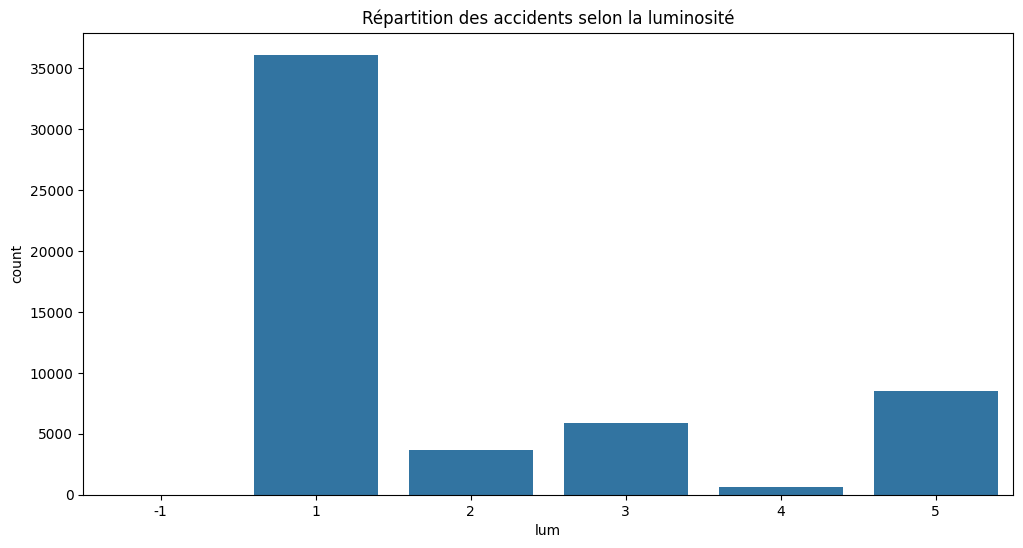

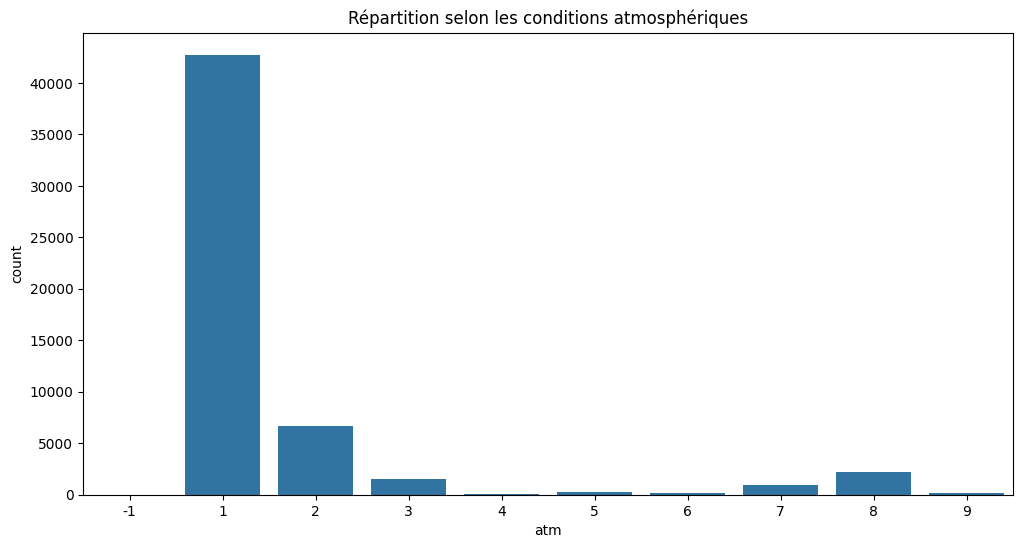

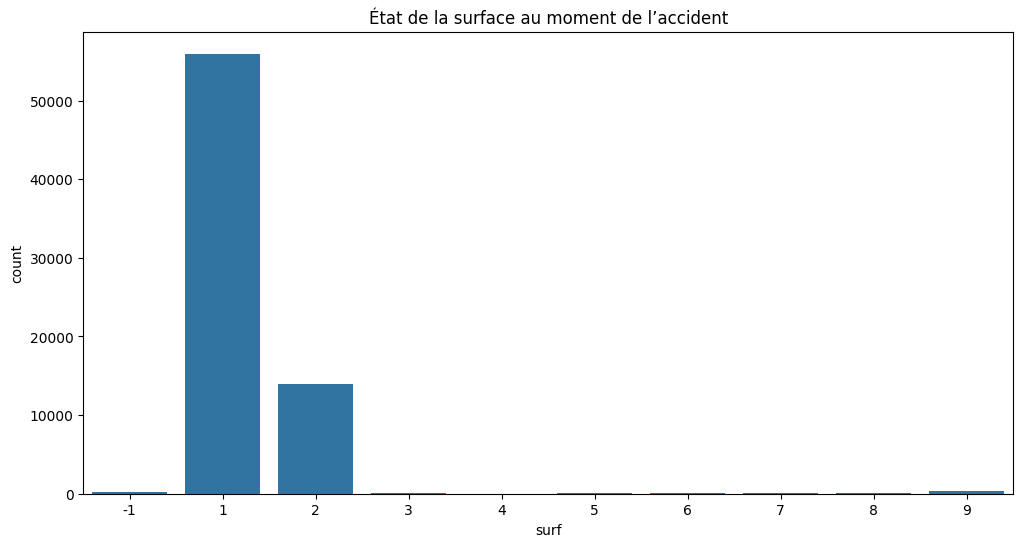

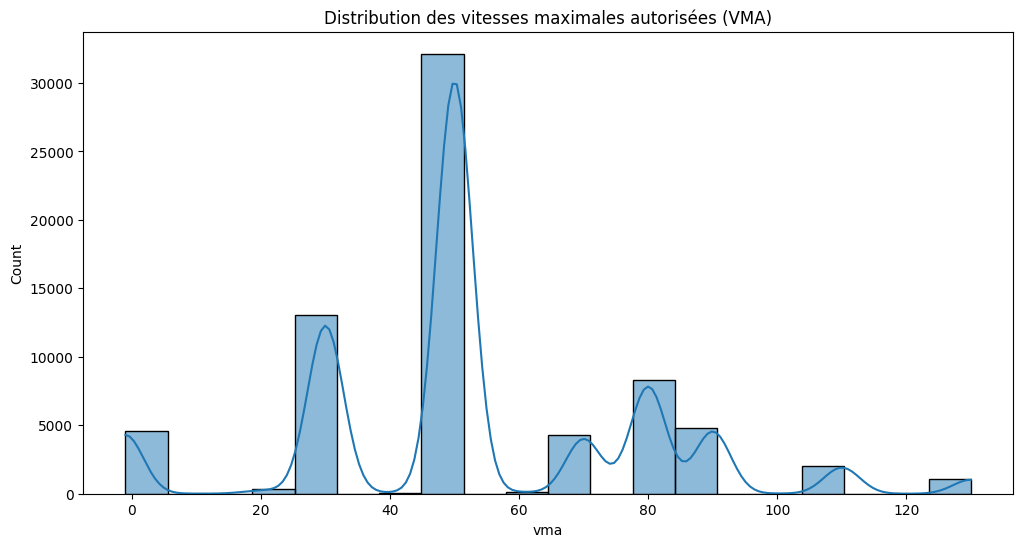

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="lum", data=df_carac)
plt.title("Répartition des accidents selon la luminosité")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="atm", data=df_carac)
plt.title("Répartition selon les conditions atmosphériques")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="surf", data=df_lieux)
plt.title("État de la surface au moment de l’accident")
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df_lieux["vma"], bins=20, kde=True)
plt.title("Distribution des vitesses maximales autorisées (VMA)")
plt.show()


#Usagers
Possibles -1 (Non rensiegné) : trajet, secu1, secu2, secu3, locp, actp, etatp  
Possible 0 signifiant inconnue : actp, locp, trajet  
Autres valeurs sgnifiant inconnue : (secu1,8), (secu2,8), (secu3,8), (locp,9), (actp,B)  
Possible problèmes : actp contient des valeurs alphabétiques  

In [ ]:
# Importation des données du tableau Usagers
df_usagers = pd.read_csv(url+'usagers-2023.csv',sep=';',encoding='utf8', engine='python')
print("------HEAD------")
print(df_usagers.head())
print("\n------SHAPE------")
print(df_usagers.shape)
print("\n------INFO------")
print(df_usagers.info())

------HEAD------
        Num_Acc    id_usager  id_vehicule num_veh  place  catu  grav  sexe  \
0  202300000001  203 851 184  155 680 557     A01      1     1     4     1   
1  202300000002  203 851 182  155 680 556     A01      1     1     1     2   
2  202300000002  203 851 183  155 680 556     A01     10     3     3     1   
3  202300000003  203 851 180  155 680 554     B01      1     1     3     1   
4  202300000003  203 851 181  155 680 555     A01      1     1     1     2   

   an_nais  trajet  secu1  secu2  secu3  locp actp  etatp  
0   1978.0       5      2      0     -1    -1   -1     -1  
1   1997.0       9      1      0     -1    -1   -1     -1  
2   1997.0       9      0     -1     -1     2    3      1  
3   1987.0       0      2      6      0     0    0     -1  
4   1984.0       0      1      0      0     0    0     -1  

------SHAPE------
(125789, 16)

------INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125789 entries, 0 to 125788
Data columns (total 16 col

an_nais semble avoir des NaN car moins de valeurs que les autres atributs et est de type float  
actp a des valeurs alphabétiques et est typé object

In [ ]:
#Affichage du ratio de valeurs NaN dans an_nais
print(df_usagers['an_nais'].isna().sum()/df_usagers.shape[0])
print(df_usagers['an_nais'].isna().sum())

0.020653634260547424
2598


In [ ]:
# Remplacement des Nan par des -1 avant de convertir les données en int
df_usagers['an_nais'] = df_usagers['an_nais'].fillna(-1).astype(int)
print(df_usagers['an_nais'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 125789 entries, 0 to 125788
Series name: an_nais
Non-Null Count   Dtype
--------------   -----
125789 non-null  int64
dtypes: int64(1)
memory usage: 982.9 KB
None


In [ ]:
#Transformation de l'année de naissance en age
# Initialize 'age' column with -1
df_usagers['age'] = -1

# Calculate age for rows where 'an_nais' is not -1
df_usagers.loc[df_usagers['an_nais'] != -1, 'age'] = 2023 - df_usagers.loc[df_usagers['an_nais'] != -1, 'an_nais']

df_usagers.drop(columns=['an_nais'], inplace=True)
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,trajet,secu1,secu2,secu3,locp,actp,etatp,age
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,5,2,0,-1,-1,-1,-1,45
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,9,1,0,-1,-1,-1,-1,26
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,9,0,-1,-1,2,3,1,26
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,0,2,6,0,0,0,-1,36
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,0,1,0,0,0,0,-1,39


In [ ]:
df_usagers['actp'].unique()

array([' -1', '3', '0', '1', '5', '9', 'B', '2', '4', 'A', '7', '6', '8'],
      dtype=object)

In [ ]:
#On remplace 'A', 'B' par des valeurs numériques
mapping = {'A': 10,'B': 11}

df_usagers['actp'] = df_usagers['actp'].replace(mapping)
df_usagers['actp'].unique()

array([' -1', '3', '0', '1', '5', '9', 11, '2', '4', 10, '7', '6', '8'],
      dtype=object)

In [ ]:
#On peut maintenant convertir les données en entiers
df_usagers['actp'] = df_usagers['actp'].astype(int)

In [ ]:
#Transformation des 0 de Trajet en -1
df_usagers['trajet'] = df_usagers['trajet'].replace(0, -1)

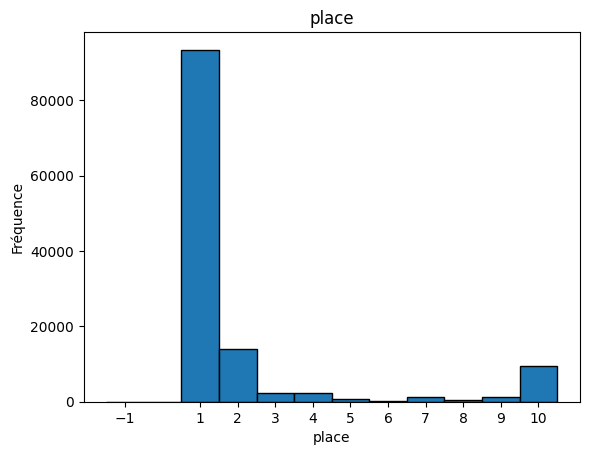

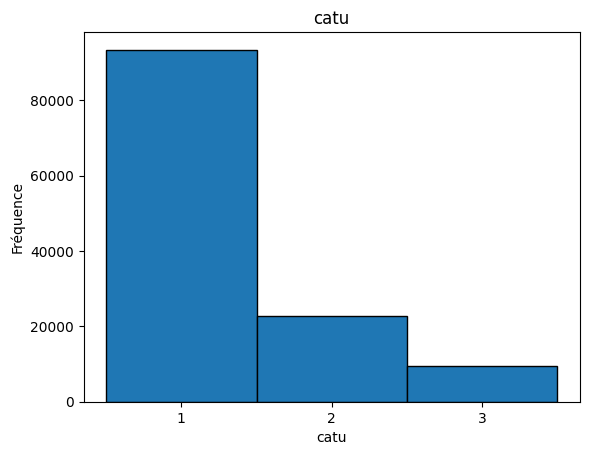

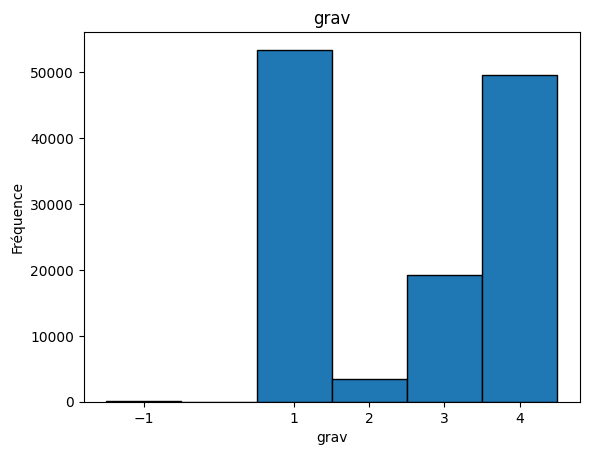

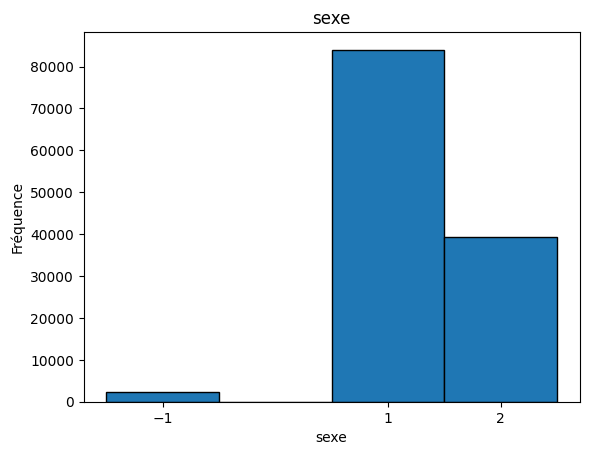

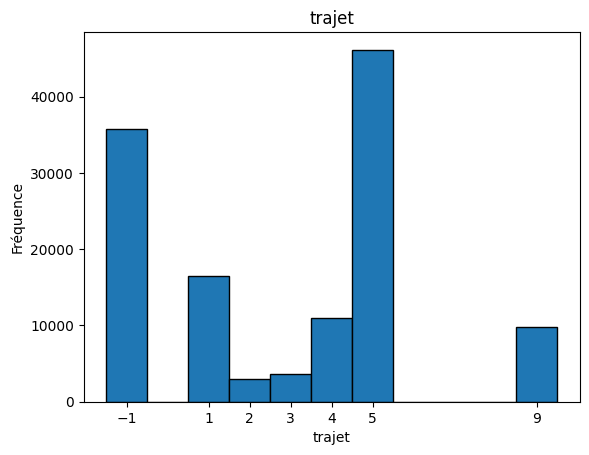

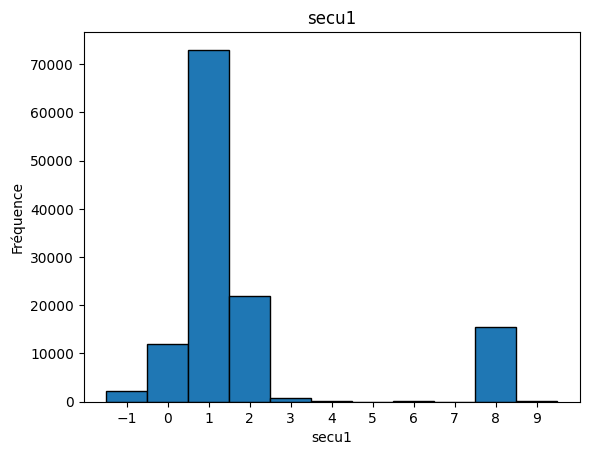

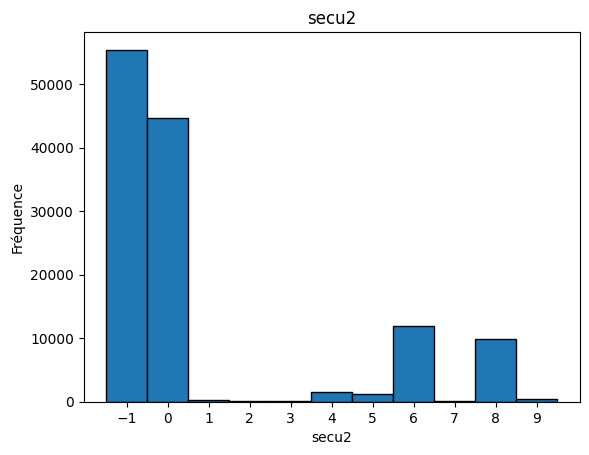

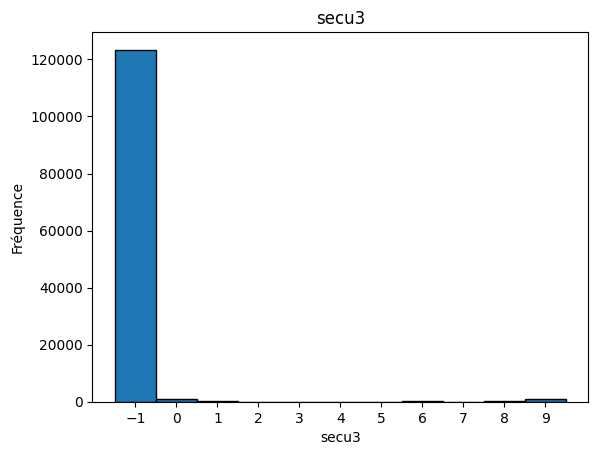

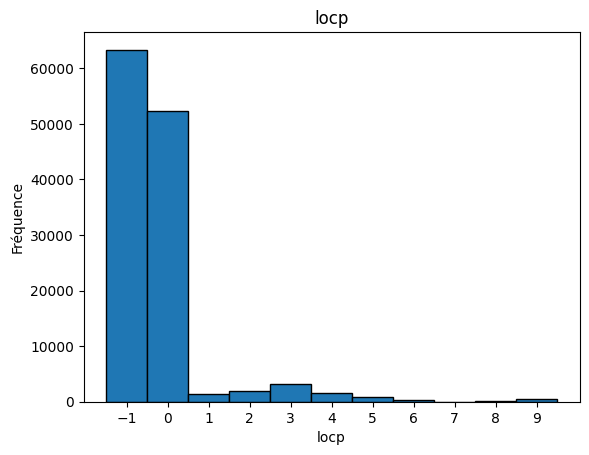

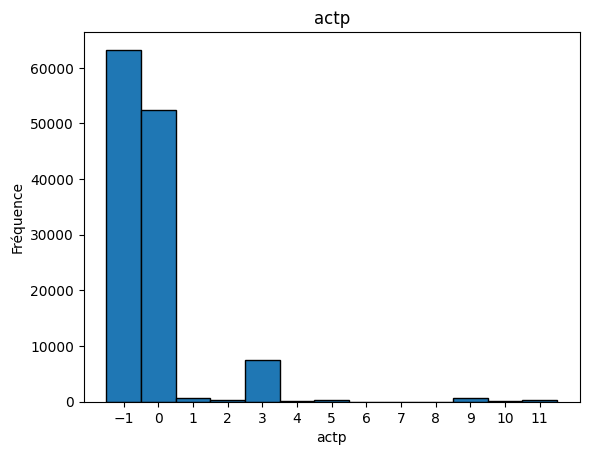

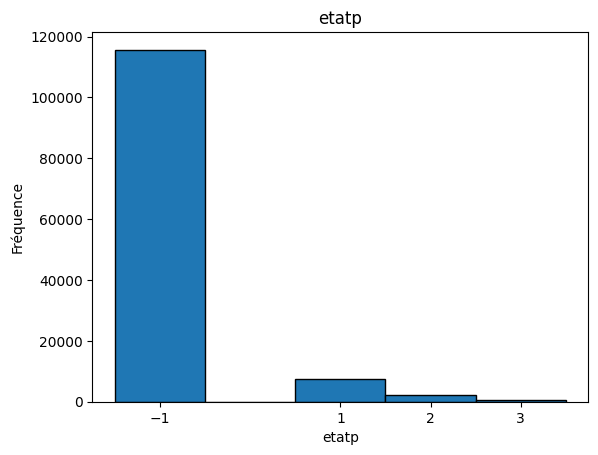

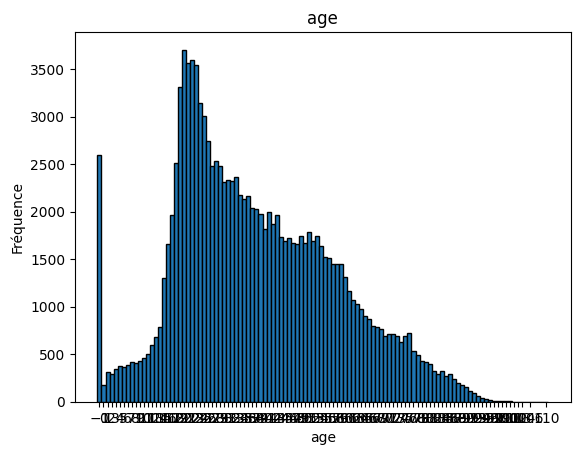

In [ ]:
#Affichage des proportions de valeurs par catégorie sous forme d'histogramme

for col in df_usagers.columns:
    if df_usagers[col].dtype != 'object' and col != 'Num_Acc':
        plt.figure()

        # Valeurs uniques de la colonne
        vals = df_usagers[col].dropna().unique()
        vals = sorted(vals)

        # Définir les bords des bins centrés sur les entiers
        bins = np.arange(min(vals) - 0.5, max(vals) + 1.5, 1)

        plt.hist(df_usagers[col], bins=bins, edgecolor='black')
        plt.xticks(vals)  # force les graduations sur les valeurs entières
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()


In [ ]:
#La fréquence de -1 par catégorie
for col in df_usagers.columns:
    freq_m1 = (df_usagers[col] == -1).mean()
    if freq_m1 > 0:
        print(f"{col:25s}  -1: {freq_m1:.2%}")


place                      -1: 0.00%
grav                       -1: 0.09%
sexe                       -1: 1.93%
trajet                     -1: 28.46%
secu1                      -1: 1.82%
secu2                      -1: 44.06%
secu3                      -1: 98.09%
locp                       -1: 50.35%
actp                       -1: 50.29%
etatp                      -1: 91.97%
age                        -1: 2.07%


In [ ]:
#Fréquence de 0 par catégorie concernée
for col in ['actp', 'locp', 'trajet']:
    freq_0 = (df_usagers[col] == 0).mean()
    if freq_0 > 0:
        print(f"{col:25s}  0: {freq_0:.2%}")

actp                       0: 41.68%
locp                       0: 41.62%


In [ ]:
#Fréquence d'autre valeurs signifiant "inconnu"
for col in ['secu1', 'secu2', 'secu3']:
    freq_8 = (df_usagers[col] == 8).mean()
    if freq_8 > 0:
        print(f"{col:25s}  8: {freq_8:.2%}")

freq_9 = (df_usagers['locp'] == 9).mean()
if freq_9 > 0:
    print(f"locp:  9: {freq_9:.2%}")

freq_11 = (df_usagers['actp'] == 11).mean()
if freq_11 > 0:
    print(f"actp:  11: {freq_11:.2%}")

secu1                      8: 12.31%
secu2                      8: 7.90%
secu3                      8: 0.19%
locp:  9: 0.42%
actp:  11: 0.30%


In [ ]:
#Version de la table usagers en regroupant par accidents
df_accidents = df_usagers.groupby("Num_Acc").agg({
    "age": "mean",
    "grav": "mean",
    "trajet": lambda x: x.mode().iloc[0]


}).reset_index()
df_accidents["nb_usagers"] = df_usagers.groupby("Num_Acc")["Num_Acc"].transform("count").groupby(df_usagers["Num_Acc"]).first().values
df_accidents.head()

,Num_Acc,age,grav,trajet,nb_usagers
0,202300000001,45.0,4.0,5,1
1,202300000002,26.0,2.0,9,2
2,202300000003,37.5,2.0,-1,2
3,202300000004,42.0,1.6,1,5
4,202300000005,22.0,2.5,-1,2


# Vehicules
- Erreur possibles dans le dataset et qui peuvent être détectées : occutc = 0  ou occutc valeur non entière
- Variables qui ont des valeurs -1 : senc, obs, obsm, choc, manv, motor  
- Variables qui ont des valeurs 0 signifiant inconnu : senc, catv, manv, motor
- Variables non numériques : Num_Veh

In [ ]:
#Importation des données du tableau Vehicules
df_vehic = pd.read_csv(url+'vehicules-2023.csv',sep=';',encoding='utf8', engine='python')
print("------HEAD------")
print(df_vehic.head())
print("\n------SHAPE------")
print(df_vehic.shape)
print("\n------INFO------")
print(df_vehic.info())



------HEAD------
        Num_Acc  id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  \
0  202300000001  155 680 557     A01     1    30    0     0     5     1   
1  202300000002  155 680 556     A01     2     7    0     1     1     1   
2  202300000003  155 680 554     B01     1     2    0     2     1    16   
3  202300000003  155 680 555     A01     2     7    0     2     2    15   
4  202300000004  155 680 551     B01     1     7    0     2     9     2   

   motor  occutc  
0      1     NaN  
1      1     NaN  
2      1     NaN  
3      1     NaN  
4      4     NaN  

------SHAPE------
(93585, 11)

------INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93585 entries, 0 to 93584
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      93585 non-null  int64  
 1   id_vehicule  93585 non-null  object 
 2   num_veh      93585 non-null  object 
 3   senc         93585 non-null  int64  
 4   cat

### Problèmes detectés
- la colonnes occutc n'a que 838 valeurs et est typé float64-> afficher le ratio de valeurs NaN afin de décider de la pertinance de cette colonne
- trop de valeurs possibles pour certaines catégories -> regroupement de valeurs

In [ ]:
#Affichage du ratio de valeurs NaN dans occutc
print(df_vehic['occutc'].isna().sum()/df_vehic.shape[0])


0.9910455735427686


In [ ]:
#Suppression de occutc
df_vehic = df_vehic.drop(columns=['occutc'])

In [ ]:
#Simplification catv
mapping_catv = {
    0: "Indéterminé",
    1: "Vélo/EDPM", 50: "Vélo/EDPM", 60: "Vélo/EDPM", 80: "Vélo/EDPM",
    2: "2RM <=125cc", 30: "2RM <=125cc", 31: "2RM <=125cc", 32: "2RM <=125cc",
    35: "2RM <=125cc", 41: "2RM <=125cc", 42: "2RM <=125cc",
    33: "2RM >125cc", 34: "2RM >125cc", 36: "2RM >125cc", 43: "2RM >125cc",
    3: "Voiture particulière", 7: "Voiture particulière",
    10: "Utilitaire léger",
    13: "Autre/obsolète", 14: "Autre/obsolète", 15: "Autre/obsolète",
    16: "Autre/obsolète", 17: "Autre/obsolète",
    37: "Autre/obsolète", 38: "Autre/obsolète",
    20: "Autre/obsolète", 21: "Autre/obsolète",
    19: "Autre/obsolète", 39: "Autre/obsolète", 40: "Autre/obsolète",
    4: "Autre/obsolète", 5: "Autre/obsolète", 6: "Autre/obsolète",
    8: "Autre/obsolète", 9: "Autre/obsolète", 11: "Autre/obsolète",
    12: "Autre/obsolète", 18: "Autre/obsolète", 99: "Autre/obsolète"
}

df_vehic["catv"] = df_vehic["catv"].map(mapping_catv).fillna("Autre/obsolète")


In [ ]:
#Afficher le pourcentage pour chaque variable de chaque catégorie
print(df_vehic["catv"].value_counts(normalize=True).round(3) * 100)

catv
Voiture particulière    58.9
2RM >125cc              10.0
2RM <=125cc              9.8
Vélo/EDPM                9.1
Utilitaire léger         7.3
Autre/obsolète           4.6
Indéterminé              0.3
Name: proportion, dtype: float64


In [ ]:
mapping_obs = {
    -1: "Non renseigné/sans objet", 0: "Aucun",
    1: "Véhicule stationné",
    2: "Obstacle naturel", 13: "Obstacle naturel", 17: "Obstacle naturel",
    3: "Glissière/parapet", 4: "Glissière/parapet", 10: "Glissière/parapet", 85: "Glissière/parapet",
    6: "Bâtiment/mur/pile",
    7: "Mobilier/poteau/signalisation", 8: "Mobilier/poteau/signalisation", 9: "Mobilier/poteau/signalisation",
    11: "Ilot/trottoir/bordure", 12: "Ilot/trottoir/bordure",
    14: "Autre obstacle fixe", 15: "Autre obstacle fixe",
    16: "Sortie de chaussée sans obstacle"
}

df_vehic["obs"] = df_vehic["obs"].map(mapping_obs).fillna("Non renseigné/sans objet")


In [ ]:
#Afficher le pourcentage pour chaque variable de chaque catégorie
print(df_vehic["obs"].value_counts(normalize=True).round(3) * 100)

obs
Aucun                               84.9
Obstacle naturel                     3.5
Glissière/parapet                    3.0
Véhicule stationné                   2.4
Mobilier/poteau/signalisation        2.0
Autre obstacle fixe                  1.3
Bâtiment/mur/pile                    1.2
Ilot/trottoir/bordure                1.1
Sortie de chaussée sans obstacle     0.5
Non renseigné/sans objet             0.3
Name: proportion, dtype: float64


In [ ]:
def binarize_obs(x):
    if x == "Non renseigné/sans objet":
        return np.nan
    elif x == "Aucun":
        return 0
    else:
        return 1

df_vehic["obstacle_fixe"] = df_vehic["obs"].apply(binarize_obs)
df_vehic.drop(columns=["obs"], inplace=True)

In [ ]:
mapping_obsm = {
    -1: "Non renseigné", 0: "Aucun",
    1: "Piéton",
    2: "Véhicule", 4: "Véhicule",
    5: "Animal", 6: "Animal",
    9: "Autre"
}

df_vehic["obsm"] = df_vehic["obsm"].map(mapping_obsm).fillna("Non renseigné")


In [ ]:
#Afficher le pourcentage pour chaque variable de chaque catégorie
print(df_vehic["obsm"].value_counts(normalize=True).round(3) * 100)

obsm
Véhicule         70.1
Aucun            19.0
Piéton            9.0
Autre             1.7
Animal            0.2
Non renseigné     0.0
Name: proportion, dtype: float64


In [ ]:
df_vehic["collision_vehicule_mb"] = (df_vehic["obsm"] == "Véhicule").astype(int)
df_vehic["collision_pieton"] = (df_vehic["obsm"] == "Piéton").astype(int)
df_vehic.drop(columns=["obsm"], inplace=True)

In [ ]:
mapping_choc = {
    -1: "Non renseigné", 0: "Aucun",
    1: "Avant", 2: "Avant", 3: "Avant",
    4: "Arrière", 5: "Arrière", 6: "Arrière",
    7: "Côté", 8: "Côté",
    9: "Chocs multiples"
}

df_vehic["choc"] = df_vehic["choc"].map(mapping_choc).fillna("Non renseigné")


In [ ]:
#Afficher le pourcentage pour chaque variable de chaque catégorie
print(df_vehic["choc"].value_counts(normalize=True).round(3) * 100)

choc
Avant              63.6
Arrière            16.0
Côté               12.8
Aucun               6.3
Chocs multiples     1.4
Non renseigné       0.1
Name: proportion, dtype: float64


In [ ]:
mapping_manv = {
    -1: "Non renseigné/inconnue", 0: "Non renseigné/inconnue",
    1: "Circulation normale", 2: "Circulation normale",
    3: "Changement de file", 9: "Changement de file",
    11: "Changement de file", 12: "Changement de file",
    13: "Changement de file", 14: "Changement de file",
    10: "Tournant/demi-tour", 15: "Tournant/demi-tour", 16: "Tournant/demi-tour",
    5: "Contresens/interdite", 6: "Contresens/interdite",
    7: "Contresens/interdite", 8: "Contresens/interdite",
    4: "Marche arrière/stationnement/arrêt", 20: "Marche arrière/stationnement/arrêt",
    23: "Marche arrière/stationnement/arrêt", 24: "Marche arrière/stationnement/arrêt",
    19: "Évitement/traversée/autre", 21: "Évitement/traversée/autre",
    22: "Évitement/traversée/autre", 25: "Évitement/traversée/autre", 26: "Évitement/traversée/autre"
}

df_vehic["manv"] = df_vehic["manv"].map(mapping_manv).fillna("Non renseigné/inconnue")



In [ ]:
#Afficher le pourcentage pour chaque variable de chaque catégorie
print(df_vehic["manv"].value_counts(normalize=True).round(3) * 100)

manv
Circulation normale                   53.0
Changement de file                    13.0
Tournant/demi-tour                    11.2
Non renseigné/inconnue                10.3
Évitement/traversée/autre              7.0
Marche arrière/stationnement/arrêt     3.7
Contresens/interdite                   1.7
Name: proportion, dtype: float64


### Detection et gestion des valeurs manquantes ou inconnues

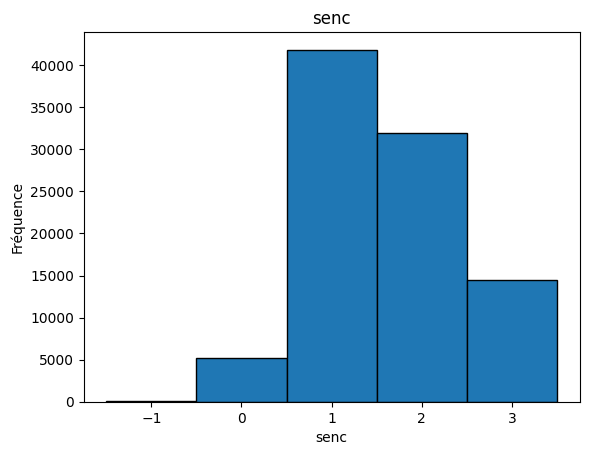

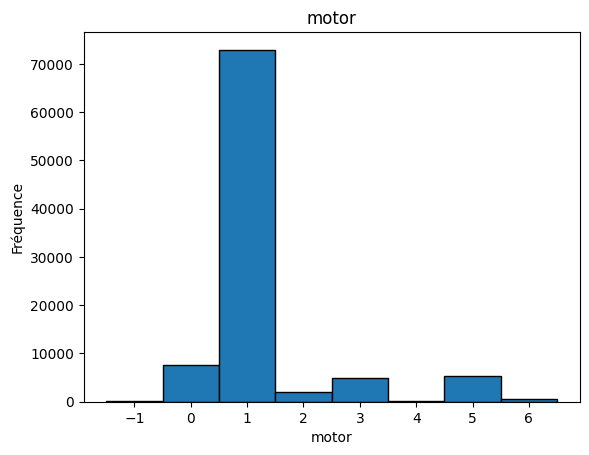

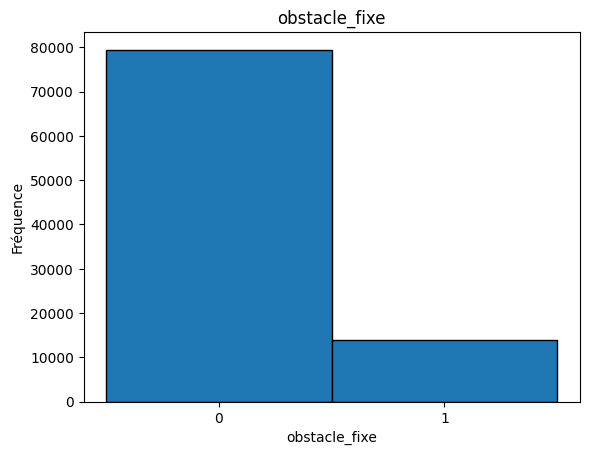

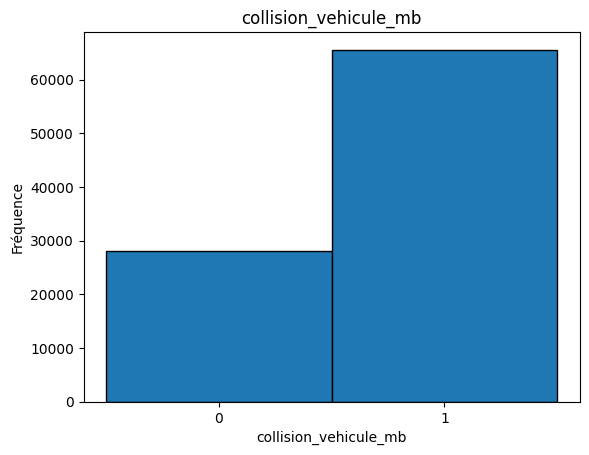

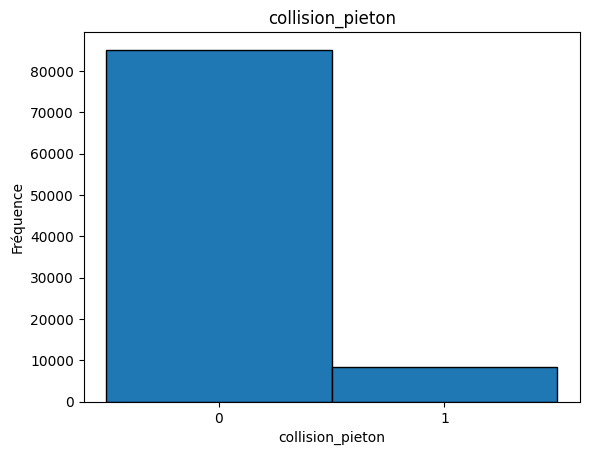

In [ ]:
#Affichage des proportions de valeurs par catégorie sous forme d'histogramme

for col in df_vehic.columns:
    if df_vehic[col].dtype != 'object' and col != 'Num_Acc':
        plt.figure()

        # Valeurs uniques de la colonne
        vals = df_vehic[col].dropna().unique()
        vals = sorted(vals)

        # Définir les bords des bins centrés sur les entiers
        bins = np.arange(min(vals) - 0.5, max(vals) + 1.5, 1)

        plt.hist(df_vehic[col], bins=bins, edgecolor='black')
        plt.xticks(vals)  # force les graduations sur les valeurs entières
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()



In [ ]:
#La fréquence de -1 ou de 0 paraît grafiquement insignifiante, affichons les porportions exactes par colonne
for col in ["senc","motor"]:
    freq_0 = (df_vehic[col] == 0).mean()
    freq_m1 = (df_vehic[col] == -1).mean()
    if freq_0 > 0 or freq_m1 > 0:
        print(f"{col:25s}  0: {freq_0:.2%}   -1: {freq_m1:.2%}")


senc                       0: 5.53%   -1: 0.11%
motor                      0: 8.05%   -1: 0.19%


La proportion de -1 pour l'ensemble des données est insgnifiante, on va donc supprimer les lignes concernées  
La Proportion de 0 est elevé pour obs et obsm mais sur ces colonnes la velur correspond à "Aucun" et non pas à "Inconnue", on peut donc les concerver, c'est aussi le cas pour choc  
Pour les autres colonnes le pourcentage reste inférieur à 10%, on fait donc le choix de supprimer les lignes concernées  

#Création variable gravité moyenne

In [ ]:
gravite_par_accident = df_usagers.groupby('Num_Acc', as_index=False)['grav'].mean()
gravite_par_accident.rename(columns={'grav': 'gravite_moyenne'}, inplace=True)
df_vehic = pd.merge(df_vehic, gravite_par_accident, on='Num_Acc', how='left')
df_vehic.head()


,Num_Acc,id_vehicule,num_veh,senc,catv,choc,manv,motor,obstacle_fixe,collision_vehicule_mb,collision_pieton,gravite_moyenne
0,202300000001,155 680 557,A01,1,2RM <=125cc,Arrière,Circulation normale,1,0.0,0,0,4.0
1,202300000002,155 680 556,A01,2,Voiture particulière,Avant,Circulation normale,1,0.0,0,1,2.0
2,202300000003,155 680 554,B01,1,2RM <=125cc,Avant,Tournant/demi-tour,1,0.0,1,0,2.0
3,202300000003,155 680 555,A01,2,Voiture particulière,Avant,Tournant/demi-tour,1,0.0,1,0,2.0
4,202300000004,155 680 551,B01,1,Voiture particulière,Chocs multiples,Circulation normale,4,0.0,1,0,1.6


# Fusion fichiers lieux et caractéristiques

In [ ]:
# Fusion des deux fichiers sur la colonne commune 'Num_Acc'
df_1 = pd.merge(df_carac, df_lieux, on='Num_Acc', how='inner')

print("Forme du DataFrame fusionné :", df_1.shape)
df_1.head()

Forme du DataFrame fusionné : (70860, 32)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,1,1,0,1,NaN,-1,2,5,1,50


**Sélection des colonnes utiles**

In [ ]:
cols = ["Num_Acc","atm", "lum", "agg", "int", "catr", "surf", "vma", "lat", "long"]
df_1 = df_1[cols]

print("Dimensions après sélection :", df_1.shape)
df_1.head()


Dimensions après sélection : (70860, 10)


,Num_Acc,atm,lum,agg,int,catr,surf,vma,lat,long
0,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100"
1,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100"
2,202300000002,3,5,2,1,3,2,50,"48,84547782","2,42868146"
3,202300000003,2,1,2,3,3,2,50,"48,76240000","2,40655000"
4,202300000003,2,1,2,3,3,2,50,"48,76240000","2,40655000"


#Fusion usagers et véhicules

In [ ]:
# Fusion des deux fichiers sur la colonne commune 'Num_Acc'
df_2 = pd.merge(df_vehic, df_usagers, on=['Num_Acc','id_vehicule','num_veh'], how='inner')

print("Forme du DataFrame fusionné :", df_2.shape)
df_2.head()

Forme du DataFrame fusionné : (125789, 25)


,Num_Acc,id_vehicule,num_veh,senc,catv,choc,manv,motor,obstacle_fixe,collision_vehicule_mb,...,grav,sexe,trajet,secu1,secu2,secu3,locp,actp,etatp,age
0,202300000001,155 680 557,A01,1,2RM <=125cc,Arrière,Circulation normale,1,0.0,0,...,4,1,5,2,0,-1,-1,-1,-1,45
1,202300000002,155 680 556,A01,2,Voiture particulière,Avant,Circulation normale,1,0.0,0,...,1,2,9,1,0,-1,-1,-1,-1,26
2,202300000002,155 680 556,A01,2,Voiture particulière,Avant,Circulation normale,1,0.0,0,...,3,1,9,0,-1,-1,2,3,1,26
3,202300000003,155 680 554,B01,1,2RM <=125cc,Avant,Tournant/demi-tour,1,0.0,1,...,3,1,-1,2,6,0,0,0,-1,36
4,202300000003,155 680 555,A01,2,Voiture particulière,Avant,Tournant/demi-tour,1,0.0,1,...,1,2,-1,1,0,0,0,0,-1,39


In [ ]:
df_2.columns

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'choc', 'manv',
       'motor', 'obstacle_fixe', 'collision_vehicule_mb', 'collision_pieton',
       'gravite_moyenne', 'id_usager', 'place', 'catu', 'grav', 'sexe',
       'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp', 'age'],
      dtype='object')

**Sélection des colonnes utiles**

In [ ]:
cols = ["Num_Acc","catv",'manv','choc','obstacle_fixe','collision_vehicule_mb','collision_pieton','catu','grav','sexe','age','trajet','gravite_moyenne']
df_2 = df_2[cols]

print("Dimensions après sélection :", df_2.shape)
df_2.head()

Dimensions après sélection : (125789, 13)


,Num_Acc,catv,manv,choc,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
0,202300000001,2RM <=125cc,Circulation normale,Arrière,0.0,0,0,1,4,1,45,5,4.0
1,202300000002,Voiture particulière,Circulation normale,Avant,0.0,0,1,1,1,2,26,9,2.0
2,202300000002,Voiture particulière,Circulation normale,Avant,0.0,0,1,3,3,1,26,9,2.0
3,202300000003,2RM <=125cc,Tournant/demi-tour,Avant,0.0,1,0,1,3,1,36,-1,2.0
4,202300000003,Voiture particulière,Tournant/demi-tour,Avant,0.0,1,0,1,1,2,39,-1,2.0


In [ ]:
#Fusion df_accidents et véhicules
df_2_accident = pd.merge(df_accidents, df_vehic, on='Num_Acc', how='inner')

print("Forme du DataFrame fusionné :", df_2_accident.shape)
df_2_accident.head()

Forme du DataFrame fusionné : (93585, 16)


,Num_Acc,age,grav,trajet,nb_usagers,id_vehicule,num_veh,senc,catv,choc,manv,motor,obstacle_fixe,collision_vehicule_mb,collision_pieton,gravite_moyenne
0,202300000001,45.0,4.0,5,1,155 680 557,A01,1,2RM <=125cc,Arrière,Circulation normale,1,0.0,0,0,4.0
1,202300000002,26.0,2.0,9,2,155 680 556,A01,2,Voiture particulière,Avant,Circulation normale,1,0.0,0,1,2.0
2,202300000003,37.5,2.0,-1,2,155 680 554,B01,1,2RM <=125cc,Avant,Tournant/demi-tour,1,0.0,1,0,2.0
3,202300000003,37.5,2.0,-1,2,155 680 555,A01,2,Voiture particulière,Avant,Tournant/demi-tour,1,0.0,1,0,2.0
4,202300000004,42.0,1.6,1,5,155 680 551,B01,1,Voiture particulière,Chocs multiples,Circulation normale,4,0.0,1,0,1.6


#Fusion finale

In [ ]:
df = pd.merge(df_1, df_2, on='Num_Acc', how='inner')

print("Forme du DataFrame fusionné :", df.shape)
df.head()

Forme du DataFrame fusionné : (163683, 22)


,Num_Acc,atm,lum,agg,int,catr,surf,vma,lat,long,...,choc,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
0,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100",...,Arrière,0.0,0,0,1,4,1,45,5,4.0
1,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100",...,Arrière,0.0,0,0,1,4,1,45,5,4.0
2,202300000002,3,5,2,1,3,2,50,"48,84547782","2,42868146",...,Avant,0.0,0,1,1,1,2,26,9,2.0
3,202300000002,3,5,2,1,3,2,50,"48,84547782","2,42868146",...,Avant,0.0,0,1,3,3,1,26,9,2.0
4,202300000003,2,1,2,3,3,2,50,"48,76240000","2,40655000",...,Avant,0.0,1,0,1,3,1,36,-1,2.0


In [ ]:
#Fusion version accidents
df_accidents_final = pd.merge(df_1, df_2_accident, on='Num_Acc', how='inner')

print("Forme du DataFrame fusionné :", df_accidents_final.shape)
df.head()

Forme du DataFrame fusionné : (122676, 25)


,Num_Acc,atm,lum,agg,int,catr,surf,vma,lat,long,...,choc,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
0,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100",...,Arrière,0.0,0,0,1,4,1,45,5,4.0
1,202300000001,2,1,2,4,4,2,30,"48,86638600","2,32347100",...,Arrière,0.0,0,0,1,4,1,45,5,4.0
2,202300000002,3,5,2,1,3,2,50,"48,84547782","2,42868146",...,Avant,0.0,0,1,1,1,2,26,9,2.0
3,202300000002,3,5,2,1,3,2,50,"48,84547782","2,42868146",...,Avant,0.0,0,1,3,3,1,26,9,2.0
4,202300000003,2,1,2,3,3,2,50,"48,76240000","2,40655000",...,Avant,0.0,1,0,1,3,1,36,-1,2.0


# Nettoyage

**Suppression de NumAcc**

In [ ]:
df.drop(columns=["Num_Acc"], inplace=True)
df.head()

,atm,lum,agg,int,catr,surf,vma,lat,long,catv,...,choc,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
0,2,1,2,4,4,2,30,"48,86638600","2,32347100",2RM <=125cc,...,Arrière,0.0,0,0,1,4,1,45,5,4.0
1,2,1,2,4,4,2,30,"48,86638600","2,32347100",2RM <=125cc,...,Arrière,0.0,0,0,1,4,1,45,5,4.0
2,3,5,2,1,3,2,50,"48,84547782","2,42868146",Voiture particulière,...,Avant,0.0,0,1,1,1,2,26,9,2.0
3,3,5,2,1,3,2,50,"48,84547782","2,42868146",Voiture particulière,...,Avant,0.0,0,1,3,3,1,26,9,2.0
4,2,1,2,3,3,2,50,"48,76240000","2,40655000",2RM <=125cc,...,Avant,0.0,1,0,1,3,1,36,-1,2.0


**Identifier et remplacer les valeurs manquantes / non renseignées**

atm, lum, int, surf, vma contiennent des -1 → à remplacer

agg, catr n’en ont pas

In [ ]:
# Remplacer les codes manquants (-1) par NaN
df.replace(-1, np.nan, inplace=True)
df.replace("Indéterminé", np.nan, inplace=True)
df.replace("Non renseigné/sans objet", np.nan, inplace=True)
df.replace("Non renseigné/inconnue", np.nan, inplace=True)
df.replace("Non renseigné", np.nan, inplace=True)
df.replace("Autre/obsolète", np.nan, inplace=True)

# Vérifier le nombre de valeurs manquantes par colonne
df.isna().sum()

,0
atm,7
lum,3
agg,0
int,10
catr,0
surf,505
vma,10360
lat,0
long,0
catv,8119


**Nettoyer les coordonnées géographiques**

Certaines coordonnées GPS sont manifestement invalides (-17, -150)

On ne garde que la France métropolitaine:

Latitude entre 41° et 52°

Longitude entre -6° et 10°

In [ ]:
# Remplacer les virgules par des points dans lat et long
df["lat"] = df["lat"].astype(str).str.replace(",", ".", regex=False)
df["long"] = df["long"].astype(str).str.replace(",", ".", regex=False)

# Conversion en float
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")
df["long"] = pd.to_numeric(df["long"], errors="coerce")

# Vérification du type
print(df[["lat", "long"]].dtypes)

# Vérification rapide des valeurs extrêmes
print("\nValeurs minimales et maximales :")
print("Latitude :", df["lat"].min(), "→", df["lat"].max())
print("Longitude :", df["long"].min(), "→", df["long"].max())

lat     float64
long    float64
dtype: object

Valeurs minimales et maximales :
Latitude : -23.372504 → 51.04749
Longitude : -176.207 → 168.09567


In [ ]:
# Filtrer les latitudes et longitudes valides (France métropolitaine)
df = df[(df["lat"].between(41, 52)) & (df["long"].between(-6, 10))]

print("Dimensions après filtrage géographique :", df.shape)

Dimensions après filtrage géographique : (154550, 21)


**Supprimer les lignes incomplètes**

Après avoir remplacé les -1 par NaN, on supprime les lignes où une information essentielle est manquante

In [ ]:
df.dropna(inplace=True)
print("Dimensions après suppression des NaN :", df.shape)

Dimensions après suppression des NaN : (90275, 21)


Conversion en entier de variables

In [ ]:
df["obstacle_fixe"]=df["obstacle_fixe"].astype(int)
df["collision_vehicule_mb"]=df["collision_vehicule_mb"].astype(int)
df["collision_pieton"]=df["collision_pieton"].astype(int)

**Vérification du nettoyage**

In [ ]:
print("Valeurs manquantes après nettoyage :")
display(df.isna().sum())

print("\nStatistiques descriptives :")
display(df.describe())

Valeurs manquantes après nettoyage :


,0
atm,0
lum,0
agg,0
int,0
catr,0
surf,0
vma,0
lat,0
long,0
catv,0



Statistiques descriptives :


,atm,lum,agg,int,catr,surf,vma,lat,long,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
count,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000
mean,1.648762,1.939828,1.638028,2.246779,3.350762,1.261678,58.635348,47.192186,2.482953,0.153298,0.665788,0.140094,1.330413,2.545134,1.329538,39.081418,4.414733,2.517434
std,1.702875,1.500497,0.480573,1.868563,1.118656,0.716695,24.153112,2.176950,2.541680,0.360277,0.471717,0.347087,0.608049,1.375373,0.470048,19.412335,2.272525,0.669868
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,41.386030,-4.719958,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,50.000000,45.607624,1.266362,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,23.000000,3.000000,2.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,50.000000,48.136530,2.366059,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,35.000000,5.000000,2.500000
75%,1.000000,3.000000,2.000000,3.000000,4.000000,1.000000,80.000000,48.866227,4.188300,0.000000,1.000000,0.000000,2.000000,4.000000,2.000000,53.000000,5.000000,2.800000
max,9.000000,5.000000,2.000000,9.000000,9.000000,9.000000,130.000000,51.047490,9.547210,1.000000,1.000000,1.000000,3.000000,4.000000,2.000000,110.000000,9.000000,4.000000


In [ ]:
df_accidents_final.drop(columns=["Num_Acc"], inplace=True)

df_accidents_final.replace(-1, np.nan, inplace=True)
df_accidents_final.replace("Indéterminé", np.nan, inplace=True)
df_accidents_final.replace("Non renseigné/sans objet", np.nan, inplace=True)
df_accidents_final.replace("Non renseigné/inconnue", np.nan, inplace=True)
df_accidents_final.replace("Non renseigné", np.nan, inplace=True)
df_accidents_final.replace("Autre/obsolète", np.nan, inplace=True)

df_accidents_final.dropna(inplace=True)

df_accidents_final["obstacle_fixe"]=df_accidents_final["obstacle_fixe"].astype(int)
df_accidents_final["collision_vehicule_mb"]=df_accidents_final["collision_vehicule_mb"].astype(int)
df_accidents_final["collision_pieton"]=df_accidents_final["collision_pieton"].astype(int)

In [ ]:
df_accidents_final.to_csv(url+'accidents_2023_clean_ss_usagers.csv', index=False)
print("Jeu de données propre sauvegardé : accidents_2023_clean_ss_usagers.csv")

Jeu de données propre sauvegardé : accidents_2023_clean_ss_usagers.csv


In [ ]:
df_accidents_final.head()

,atm,lum,agg,int,catr,surf,vma,lat,long,age,...,num_veh,senc,catv,choc,manv,motor,obstacle_fixe,collision_vehicule_mb,collision_pieton,gravite_moyenne
0,2.0,1.0,2,4.0,4,2.0,30.0,"48,86638600","2,32347100",45.0,...,A01,1.0,2RM <=125cc,Arrière,Circulation normale,1.0,0,0,0,4.0
1,2.0,1.0,2,4.0,4,2.0,30.0,"48,86638600","2,32347100",45.0,...,A01,1.0,2RM <=125cc,Arrière,Circulation normale,1.0,0,0,0,4.0
2,3.0,5.0,2,1.0,3,2.0,50.0,"48,84547782","2,42868146",26.0,...,A01,2.0,Voiture particulière,Avant,Circulation normale,1.0,0,0,1,2.0
7,3.0,5.0,2,1.0,2,2.0,50.0,"48,73248432","2,44687575",42.0,...,B01,1.0,Voiture particulière,Chocs multiples,Circulation normale,4.0,0,1,0,1.6
9,3.0,5.0,2,1.0,2,2.0,50.0,"48,73248432","2,44687575",42.0,...,A01,1.0,Utilitaire léger,Avant,Circulation normale,1.0,0,1,0,1.6


**Sauvegarder le jeu propre**

In [ ]:
df.to_csv(url+'accidents_2023_clean.csv', index=False)
print("Jeu de données propre sauvegardé : accidents_2023_clean.csv")

Jeu de données propre sauvegardé : accidents_2023_clean.csv


# Encodage et normalisation

In [ ]:
# Charger dataset nettoyé depuis Drive
df = pd.read_csv(url+"accidents_2023_clean.csv")

df.head()

,atm,lum,agg,int,catr,surf,vma,lat,long,catv,...,choc,obstacle_fixe,collision_vehicule_mb,collision_pieton,catu,grav,sexe,age,trajet,gravite_moyenne
0,2.0,1.0,2,4.0,4,2.0,30.0,48.866386,2.323471,2RM <=125cc,...,Arrière,0,0,0,1,4.0,1.0,45.0,5.0,4.0
1,2.0,1.0,2,4.0,4,2.0,30.0,48.866386,2.323471,2RM <=125cc,...,Arrière,0,0,0,1,4.0,1.0,45.0,5.0,4.0
2,3.0,5.0,2,1.0,3,2.0,50.0,48.845478,2.428681,Voiture particulière,...,Avant,0,0,1,1,1.0,2.0,26.0,9.0,2.0
3,3.0,5.0,2,1.0,3,2.0,50.0,48.845478,2.428681,Voiture particulière,...,Avant,0,0,1,3,3.0,1.0,26.0,9.0,2.0
4,3.0,5.0,2,1.0,2,2.0,50.0,48.732484,2.446876,Voiture particulière,...,Chocs multiples,0,1,0,2,1.0,2.0,22.0,1.0,1.6


**Séparer les variables catégorielles et numériques**

In [ ]:
print(df.columns)

Index(['atm', 'lum', 'agg', 'int', 'catr', 'surf', 'vma', 'lat', 'long',
       'catv', 'manv', 'choc', 'obstacle_fixe', 'collision_vehicule_mb',
       'collision_pieton', 'catu', 'grav', 'sexe', 'age', 'trajet',
       'gravite_moyenne'],
      dtype='object')


In [ ]:
cat_cols = ["atm", "lum", "agg", "int", "catr", "surf","catv","manv","choc","catu","grav","sexe","trajet"]
num_cols = ["vma", "lat", "long","age","gravite_moyenne"]


**Encodage des variables catégorielles**

Le One-Hot Encoding crée une colonne binaire pour chaque modalité

Les variables catégorielles codées par des entiers sont en réalité nominales (ex. type de route, conditions météo), leur encodage en binaire via One-Hot Encoding permet d’éviter qu’un algorithme interprète un ordre arbitraire entre les catégories

In [ ]:
# Encodage One-Hot des variables catégorielles
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

print("Dimensions après encodage :", df_encoded.shape)
df_encoded.head()



Dimensions après encodage : (90275, 81)


,vma,lat,long,obstacle_fixe,collision_vehicule_mb,collision_pieton,age,gravite_moyenne,atm_1.0,atm_2.0,...,grav_3.0,grav_4.0,sexe_1.0,sexe_2.0,trajet_1.0,trajet_2.0,trajet_3.0,trajet_4.0,trajet_5.0,trajet_9.0
0,30.0,48.866386,2.323471,0,0,0,45.0,4.0,False,True,...,False,True,True,False,False,False,False,False,True,False
1,30.0,48.866386,2.323471,0,0,0,45.0,4.0,False,True,...,False,True,True,False,False,False,False,False,True,False
2,50.0,48.845478,2.428681,0,0,1,26.0,2.0,False,False,...,False,False,False,True,False,False,False,False,False,True
3,50.0,48.845478,2.428681,0,0,1,26.0,2.0,False,False,...,True,False,True,False,False,False,False,False,False,True
4,50.0,48.732484,2.446876,0,1,0,22.0,1.6,False,False,...,False,False,False,True,True,False,False,False,False,False


In [ ]:
# Suppression des deux colonnes agg_1 et agg_2 → on crée une seule colonne binaire
df_encoded["en_agglomeration"] = df_encoded["agg_2"]  # 1 = en agglo, 0 = hors agglo
df_encoded = df_encoded.drop(columns=["agg_1", "agg_2"])

# Suppression des deux colonnes sexe_1.0 et sexe_2.0 → on crée une seule colonne binaire
df_encoded["homme"] = df_encoded["sexe_1.0"]  # 1 = homme, 0 = femme
df_encoded = df_encoded.drop(columns=["sexe_1.0", "sexe_2.0"])


In [ ]:
df_encoded.columns

Index(['vma', 'lat', 'long', 'obstacle_fixe', 'collision_vehicule_mb',
       'collision_pieton', 'age', 'gravite_moyenne', 'atm_1.0', 'atm_2.0',
       'atm_3.0', 'atm_4.0', 'atm_5.0', 'atm_6.0', 'atm_7.0', 'atm_8.0',
       'atm_9.0', 'lum_1.0', 'lum_2.0', 'lum_3.0', 'lum_4.0', 'lum_5.0',
       'int_1.0', 'int_2.0', 'int_3.0', 'int_4.0', 'int_5.0', 'int_6.0',
       'int_7.0', 'int_8.0', 'int_9.0', 'catr_1', 'catr_2', 'catr_3', 'catr_4',
       'catr_5', 'catr_6', 'catr_7', 'catr_9', 'surf_1.0', 'surf_2.0',
       'surf_3.0', 'surf_4.0', 'surf_5.0', 'surf_6.0', 'surf_7.0', 'surf_8.0',
       'surf_9.0', 'catv_2RM <=125cc', 'catv_2RM >125cc',
       'catv_Utilitaire léger', 'catv_Voiture particulière', 'catv_Vélo/EDPM',
       'manv_Changement de file', 'manv_Circulation normale',
       'manv_Contresens/interdite', 'manv_Marche arrière/stationnement/arrêt',
       'manv_Tournant/demi-tour', 'manv_Évitement/traversée/autre',
       'choc_Arrière', 'choc_Aucun', 'choc_Avant', 'choc_Ch

In [ ]:
rename_map = {

    # --- Conditions atmosphériques (atm) ---
    'atm_1.0': 'atm_normale',
    'atm_2.0': 'atm_pluie_legere',
    'atm_3.0': 'atm_pluie_forte',
    'atm_4.0': 'atm_neige_grêle',
    'atm_5.0': 'atm_brouillard_fumée',
    'atm_6.0': 'atm_vent_fort_tempête',
    'atm_7.0': 'atm_temps_eblouissant',
    'atm_8.0': 'atm_temps_couvert',
    'atm_9.0': 'atm_autre',

    # --- Luminosité (lum) ---
    'lum_1.0': 'lum_plein_jour',
    'lum_2.0': 'lum_crepuscule_ou_aube',
    'lum_3.0': 'lum_ss_eclairage',
    'lum_4.0': 'lum_eclairage_off',
    'lum_5.0': 'lum_eclairage_on',

    # --- Type d’intersection (int) ---
    'int_1.0': 'int_aucune',
    'int_2.0': 'int_X',
    'int_3.0': 'int_T',
    'int_4.0': 'int_Y',
    'int_5.0': 'int_plus_de_4br',
    'int_6.0': 'int_giratoire',
    'int_7.0': 'int_place',
    'int_8.0': 'int_pass_niveau',
    'int_9.0': 'int_autre',

    # --- Catégorie de route (catr) ---
    'catr_1': 'route_autoroute',
    'catr_2': 'route_nationale',
    'catr_3': 'route_departem',
    'catr_4': 'route_communal',
    'catr_5': 'route_hors_reseau',
    'catr_6': 'route_parking',
    'catr_7': 'route_metropole',
    'catr_9': 'route_autre',

    # --- Surface de la chaussée (surf) ---
    'surf_1.0': 'surf_sèche',
    'surf_2.0': 'surf_mouillee',
    'surf_3.0': 'surf_flaques',
    'surf_4.0': 'surf_inondee',
    'surf_5.0': 'surf_enneigee',
    'surf_6.0': 'surf_boue',
    'surf_7.0': 'surf_verglacee',
    'surf_8.0': 'surf_grasse',
    'surf_9.0': 'surf_autre',

    # --- Catégorie d’usager (catu) ---
    'catu_1': 'conducteur',
    'catu_2': 'passager',
    'catu_3': 'pieton',

    # --- Gravité de l’accident (grav) ---
    'grav_1.0': 'grav_indemne',
    'grav_2.0': 'grav_tue',
    'grav_3.0': 'grav_blesse_hospitalise',
    'grav_4.0': 'grav_blesse_leger',

    # --- Trajet ---
    'trajet_1.0': 'trajet_domicile_travail',
    'trajet_2.0': 'trajet_domicile_ecole',
    'trajet_3.0': 'trajet_courses',
    'trajet_4.0': 'trajet_professionnel',
    'trajet_5.0': 'trajet_loisirs',
    'trajet_9.0': 'trajet_autre'
}

df_encoded = df_encoded.rename(columns=rename_map)
df_encoded.columns

Index(['vma', 'lat', 'long', 'obstacle_fixe', 'collision_vehicule_mb',
       'collision_pieton', 'age', 'gravite_moyenne', 'atm_normale',
       'atm_pluie_legere', 'atm_pluie_forte', 'atm_neige_grêle',
       'atm_brouillard_fumée', 'atm_vent_fort_tempête',
       'atm_temps_eblouissant', 'atm_temps_couvert', 'atm_autre',
       'lum_plein_jour', 'lum_crepuscule_ou_aube', 'lum_ss_eclairage',
       'lum_eclairage_off', 'lum_eclairage_on', 'int_aucune', 'int_X', 'int_T',
       'int_Y', 'int_plus_de_4br', 'int_giratoire', 'int_place',
       'int_pass_niveau', 'int_autre', 'route_autoroute', 'route_nationale',
       'route_departem', 'route_communal', 'route_hors_reseau',
       'route_parking', 'route_metropole', 'route_autre', 'surf_sèche',
       'surf_mouillee', 'surf_flaques', 'surf_inondee', 'surf_enneigee',
       'surf_boue', 'surf_verglacee', 'surf_grasse', 'surf_autre',
       'catv_2RM <=125cc', 'catv_2RM >125cc', 'catv_Utilitaire léger',
       'catv_Voiture particulière'

**Normalisation des variables numériques**

L’objectif est de mettre toutes les variables sur la même échelle (moyenne 0, écart-type 1), car sinon les variables comme lat et long domineraient le calcul des distances.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Créer une instance du scaler
scaler = StandardScaler()

# Normaliser uniquement les colonnes numériques
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Vérification
df_encoded[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
vma,90275.0,9.063306e-17,1.000006,-2.013638,-0.357527,-0.357527,0.884556,2.954694
lat,90275.0,-5.241999e-16,1.000006,-2.667120,-0.727886,0.433794,0.768989,1.770975
long,90275.0,1.334899e-16,1.000006,-2.833933,-0.478659,-0.045991,0.670956,2.779381
age,90275.0,1.503336e-16,1.000006,-2.013237,-0.828417,-0.210250,0.717001,3.653294
gravite_moyenne,90275.0,2.135367e-16,1.000006,-2.265286,-0.772446,-0.026026,0.421826,2.213235


**Sauvegarde du dataset prêt pour le clustering**

In [ ]:
df_encoded.to_csv(url+"accidents_2023_prepared.csv", index=False)
print("Jeu de données encodé et normalisé sauvegardé : accidents_2023_prepared.csv")


Jeu de données encodé et normalisé sauvegardé : accidents_2023_prepared.csv


#Clustering
Nous faisons face à une difficulté, le clustering sur de valeurs binaires. Après de nombreuses recherches deux options s'offrent à nous :   
- Adapter k-means pour son utilisation sur des valeurs binaires  
- Utiliser des algorithmes de clustering adaptés aux valeurs binaires

## K-Means adapté
K-Means classique minimise la distance euclidienne entre points et centres de clusters.
Mais cette distance n’a pas de sens pour des données binaires.
Donc on garde la logique de K-Means, mais on change la mesure de distance et la mise à jour du centre :

Distance utilisée : Hamming, Jaccard ou simple matching coefficient (SMC).

Centre du cluster : le vecteur médian (mode binaire) plutôt que la moyenne arithmétique.

Shape dataframe : (90275, 79)


,vma,lat,long,obstacle_fixe,collision_vehicule_mb,collision_pieton,age,gravite_moyenne,atm_normale,atm_pluie_legere,...,grav_blesse_hospitalise,grav_blesse_leger,trajet_domicile_travail,trajet_domicile_ecole,trajet_courses,trajet_professionnel,trajet_loisirs,trajet_autre,en_agglomeration,homme
0,-1.185582,0.769062,-0.062747,0,0,0,0.304889,2.213235,False,True,...,False,True,False,False,False,False,True,False,True,True
1,-1.185582,0.769062,-0.062747,0,0,0,0.304889,2.213235,False,True,...,False,True,False,False,False,False,True,False,True,True


Num cols detected: ['vma', 'lat', 'long', 'age', 'gravite_moyenne']
Number of binary cols: 74
N = 90275
Grand dataset N=90275, on utilisera un échantillon de 5000 pour la recherche de k.
Testing k = 2
Converged at iter 19
 k=2 => silhouette (sample) = 0.1984
Testing k = 3
Converged at iter 16
 k=3 => silhouette (sample) = 0.1596
Testing k = 4
Converged at iter 25
 k=4 => silhouette (sample) = 0.1682
Testing k = 5
Converged at iter 34
 k=5 => silhouette (sample) = 0.1801
Testing k = 6
Converged at iter 26
 k=6 => silhouette (sample) = 0.1840
Testing k = 7
Converged at iter 47
 k=7 => silhouette (sample) = 0.1829
Testing k = 8
Converged at iter 32
 k=8 => silhouette (sample) = 0.1782
Testing k = 9
Converged at iter 53
 k=9 => silhouette (sample) = 0.1802
Testing k = 10
Converged at iter 64
 k=10 => silhouette (sample) = 0.1816


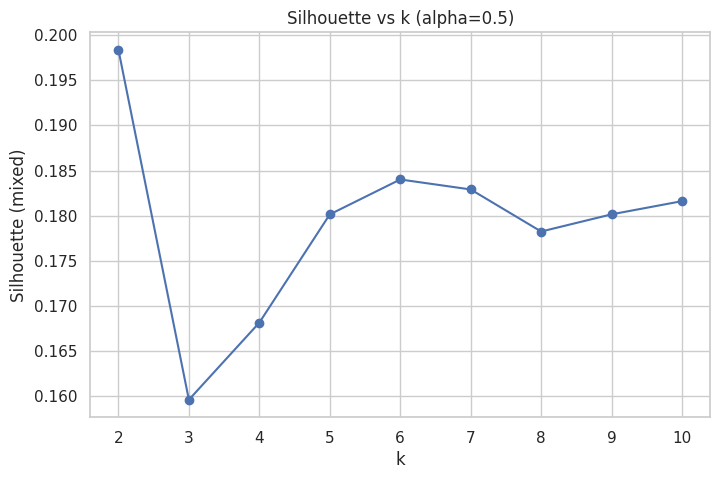

k_opt (max silhouette on sample) = 2
Entraînement final sur tout le dataset avec k_opt: 2
Converged at iter 18
Résultats sauvegardés dans: accidents_2023_adapted.csv

Top 30 features discriminantes (variance inter-clusters):


,0
vma,1.612280
en_agglomeration,0.383376
route_communal,0.175170
int_aucune,0.073634
route_departem,0.043165
lat,0.033336
route_autoroute,0.027548
lum_eclairage_on,0.018736
lum_ss_eclairage,0.018721
collision_pieton,0.017698


cluster_adapted,0,1
vma,1.1669,-0.6288
en_agglomeration,0.0690,0.9447
route_communal,0.0668,0.6587
int_aucune,0.7408,0.3571
route_departem,0.5710,0.2771
lat,-0.1678,0.0904
route_autoroute,0.2431,0.0084
lum_eclairage_on,0.0352,0.2288
lum_ss_eclairage,0.2248,0.0313
collision_pieton,0.0178,0.2060


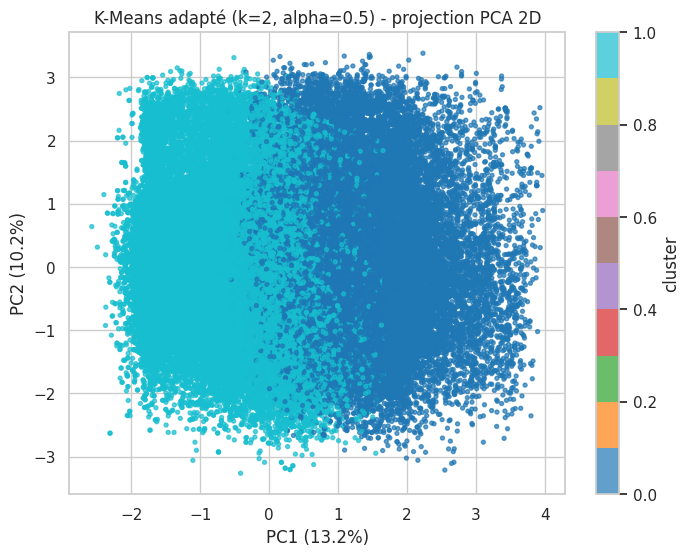

In [ ]:
import os
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import PCA
sns.set(style="whitegrid")

# 1) Chargement du fichier préparé (One-Hot + numeric normalized)
df = pd.read_csv(url+"accidents_2023_prepared.csv")
print("Shape dataframe :", df.shape)
display(df.head(2))

# 2) Détecter automatiquement colonnes numériques continues vs binaires
# On suppose que les colonnes continues ont plusieurs valeurs (non {0,1}) et sont listées explicitement:
possible_num = ['vma','lat','long','age','gravite_moyenne']
num_cols = [c for c in possible_num if c in df.columns]
# Les autres colonnes numériques qu'on traitera comme binaires (valeurs 0/1)
bin_cols = [c for c in df.columns if c not in num_cols]

print("Num cols detected:", num_cols)
print("Number of binary cols:", len(bin_cols))

X_num = df[num_cols].to_numpy(dtype=float) if len(num_cols)>0 else np.zeros((len(df),0))
X_bin = df[bin_cols].to_numpy(dtype=int) if len(bin_cols)>0 else np.zeros((len(df),0))

N, _ = df.shape
print("N =", N)

# 3) Fonctions utilitaires : distances et mise à jour des centres
from scipy.spatial.distance import cdist

def euclidean_normed_matrix(X_num):
    """Compute pairwise Euclidean distance matrix and normalize by sqrt(n_num).
       Returns matrix (N,N)."""
    if X_num.shape[1] == 0:
        return np.zeros((X_num.shape[0], X_num.shape[0]))
    D = pairwise_distances(X_num, metric='euclidean')  # shape (N,N)
    # normalize by sqrt(d) to get RMS scale
    D = D / np.sqrt(max(1, X_num.shape[1]))
    return D

def hamming_matrix(X_bin):
    """Pairwise Hamming distance matrix (proportion of differing bits)."""
    if X_bin.shape[1] == 0:
        return np.zeros((X_bin.shape[0], X_bin.shape[0]))
    return pairwise_distances(X_bin, metric='hamming')

def mixed_distance_matrix(X_num, X_bin, alpha=0.5):
    """Compute mixed distance: alpha * normalized_euclid + (1-alpha) * hamming"""
    Dn = euclidean_normed_matrix(X_num)
    Db = hamming_matrix(X_bin)
    return alpha * Dn + (1.0 - alpha) * Db

def compute_distance_to_centroids(X_num, X_bin, centroids_num, centroids_bin, alpha=0.5):
    """Return distance matrix (N x k) between points and centroids using mixed metric."""
    # numeric part:
    if centroids_num.shape[1] > 0:
        Dn = pairwise_distances(X_num, centroids_num, metric='euclidean') / np.sqrt(max(1, centroids_num.shape[1]))
    else:
        Dn = np.zeros((X_num.shape[0], centroids_num.shape[0]))
    # binary part:
    if centroids_bin.shape[1] > 0:
        # Hamming between rows: proportion of positions different
        # pairwise_distances supports binary arrays for 'hamming'
        Db = pairwise_distances(X_bin, centroids_bin, metric='hamming')
    else:
        Db = np.zeros((X_bin.shape[0], centroids_bin.shape[0]))
    return alpha * Dn + (1.0 - alpha) * Db

def mode_bin(cluster_points_bin):
    """Compute mode vector (0/1) for binary columns: 1 where mean >= 0.5."""
    if cluster_points_bin.size == 0:
        return None
    mean = cluster_points_bin.mean(axis=0)
    return (mean >= 0.5).astype(int)

# 4) Algorithme K-Means adapté (mixte)
def kmeans_adapted_mixed(X_num, X_bin, k=4, alpha=0.5, max_iter=100, tol=1e-6, init_seed=42):
    """
    X_num: (N, d_num) numeric matrix (floats)
    X_bin: (N, d_bin) binary matrix (0/1 ints)
    alpha: weight for numeric distance [0..1] (alpha=1 => only numeric)
    Returns: labels (N,), centroids_num (k,d_num), centroids_bin (k,d_bin)
    """
    rng = np.random.default_rng(init_seed)
    N = X_num.shape[0]
    # Initialize centroids by sampling k points
    idx = rng.choice(N, size=k, replace=False)
    centroids_num = X_num[idx].astype(float) if X_num.shape[1]>0 else np.zeros((k,0))
    centroids_bin = X_bin[idx].astype(int) if X_bin.shape[1]>0 else np.zeros((k,0), dtype=int)

    labels = np.full(N, -1, dtype=int)
    for it in range(max_iter):
        # Compute distances to centroids (N x k)
        D = compute_distance_to_centroids(X_num, X_bin, centroids_num, centroids_bin, alpha=alpha)
        new_labels = np.argmin(D, axis=1)

        # Check if labels changed
        if np.array_equal(new_labels, labels):
            print(f"Converged at iter {it}")
            break
        labels = new_labels

        # Update centroids
        new_centroids_num = np.zeros_like(centroids_num)
        new_centroids_bin = np.zeros_like(centroids_bin)
        for j in range(k):
            members = (labels == j)
            if members.sum() == 0:
                # empty cluster: reinitialize centroid randomly
                ridx = rng.choice(N)
                new_centroids_num[j] = X_num[ridx] if X_num.shape[1]>0 else np.zeros((0,))
                new_centroids_bin[j] = X_bin[ridx] if X_bin.shape[1]>0 else np.zeros((0,), dtype=int)
            else:
                if X_num.shape[1]>0:
                    new_centroids_num[j] = X_num[members].mean(axis=0)
                if X_bin.shape[1]>0:
                    new_centroids_bin[j] = mode_bin(X_bin[members])
        # Convergence check on centroids (strict equality for bin, l2 for numeric)
        if X_num.shape[1]>0:
            diff_num = np.linalg.norm(new_centroids_num - centroids_num)
        else:
            diff_num = 0
        if X_bin.shape[1]>0:
            diff_bin = np.sum(new_centroids_bin != centroids_bin)
        else:
            diff_bin = 0
        centroids_num, centroids_bin = new_centroids_num, new_centroids_bin
        if diff_num < tol and diff_bin == 0:
            print(f"Centroids converged at iter {it}")
            break
    return labels, centroids_num, centroids_bin

# 5) Fonction utilitaire pour évaluer silhouette (avec échantillonnage si nécessaire)
def silhouette_mixed_score(X_num, X_bin, labels, alpha=0.5, sample_size=2000, random_state=42):
    """
    Compute silhouette score using mixed distance. If N>sample_size, compute on sample.
    Returns silhouette_score (float).
    """
    N = X_num.shape[0]
    if N > sample_size:
        rng = np.random.default_rng(random_state)
        idx = rng.choice(N, size=sample_size, replace=False)
        Xn = X_num[idx]
        Xb = X_bin[idx]
        lbl = labels[idx]
    else:
        Xn = X_num; Xb = X_bin; lbl = labels
    # build pairwise mixed distance matrix for sample
    Dn = euclidean_normed_matrix(Xn)
    Db = hamming_matrix(Xb)
    D = alpha * Dn + (1.0 - alpha) * Db
    # silhouette_score with precomputed distance matrix
    return silhouette_score(D, lbl, metric='precomputed')

# 6) Exécution : tester k dans une plage et choisir k_opt via silhouette
alpha = 0.5   # pondération entre numérique et binaire (0..1). à tester (0.3,0.5,0.7)
k_values = list(range(2,11))
sil_scores = []
labels_dict = {}
centroids_dict = {}

# Pour raisons de coût, on peut travailler sur un sous-échantillon pour initial tests
N = X_num.shape[0]
max_train = 5000  # si N>max_train on utilisera un échantillon pour loop d'optimisation
if N > max_train:
    print(f"Grand dataset N={N}, on utilisera un échantillon de {max_train} pour la recherche de k.")
    rng = np.random.default_rng(42)
    sample_idx = rng.choice(N, max_train, replace=False)
    Xn_sample = X_num[sample_idx]
    Xb_sample = X_bin[sample_idx]
else:
    Xn_sample = X_num
    Xb_sample = X_bin

for k in k_values:
    print("Testing k =", k)
    lab, cnum, cbin = kmeans_adapted_mixed(Xn_sample, Xb_sample, k=k, alpha=alpha, max_iter=100)
    # compute silhouette on sample (fast)
    sil = silhouette_mixed_score(Xn_sample, Xb_sample, lab, alpha=alpha, sample_size=min(2000, len(Xn_sample)))
    sil_scores.append(sil)
    labels_dict[k] = (lab, cnum, cbin)  # on stocke résultats sur l'échantillon
    print(f" k={k} => silhouette (sample) = {sil:.4f}")

# Plot silhouette vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette (mixed)')
plt.title(f"Silhouette vs k (alpha={alpha})")
plt.grid(True)
plt.show()

# Sélection automatique k_opt = argmax(silhouette)
k_opt = k_values[int(np.argmax(sil_scores))]
print("k_opt (max silhouette on sample) =", k_opt)

# 7) Réentraîner sur tout le dataset avec k_opt (attention coût)
print("Entraînement final sur tout le dataset avec k_opt:", k_opt)
labels_full, cnum_full, cbin_full = kmeans_adapted_mixed(X_num, X_bin, k=k_opt, alpha=alpha, max_iter=200)

# Ajouter labels au DataFrame
df['cluster_adapted'] = labels_full

# 8) Sauvegarder résultats
df.to_csv(url+"accidents_2023_adapted.csv", index=False)
print("Résultats sauvegardés dans:", "accidents_2023_adapted.csv")

# 9) Profiling : variables les plus discriminantes par cluster (moyennes / proportions)
summary = df.groupby('cluster_adapted').mean().T
# compute variance between cluster means
feature_scores = summary.var(axis=1).sort_values(ascending=False)
top_features = feature_scores.head(30).index.tolist()

print("\nTop 30 features discriminantes (variance inter-clusters):")
display(feature_scores.head(30))

display(summary.loc[top_features].round(4))

# 10) PCA 2D pour visualisation (sur toutes les features)
# On construit X_all = [X_num , X_bin] numeric for PCA visualization (note: PCA on binary OK for visualization)
X_all = np.hstack([X_num, X_bin])
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_all)

plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=df['cluster_adapted'], cmap='tab10', s=8, alpha=0.7)
plt.title(f"K-Means adapté (k={k_opt}, alpha={alpha}) - projection PCA 2D")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.colorbar(label='cluster')
plt.show()


,en_agglomeration,route_communal,int_aucune,route_departem,route_autoroute,lum_eclairage_on,lum_ss_eclairage,collision_pieton,trajet_loisirs,int_T,int_X,catv_Voiture particulière,passager,manv_Tournant/demi-tour,obstacle_fixe
cluster_adapted,,,,,,,,,,,,,,,
0,6.90,6.68,74.08,57.10,24.31,3.52,22.48,1.78,62.29,7.73,11.49,74.24,26.84,6.65,22.46
1,94.47,65.87,35.71,27.71,0.84,22.88,3.13,20.60,46.83,22.06,25.75,60.56,13.53,18.64,11.49


/tmp/ipython-input-2162588803.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster_adapted', y=col, palette='tab10')


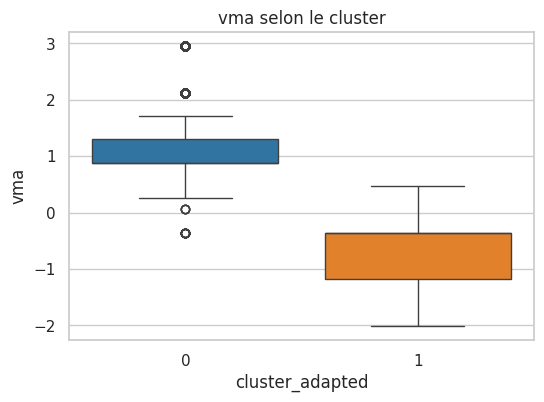

/tmp/ipython-input-2162588803.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster_adapted', y=col, palette='tab10')


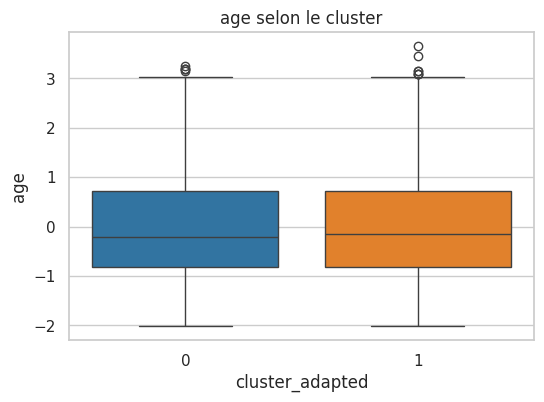

/tmp/ipython-input-2162588803.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster_adapted', y=col, palette='tab10')


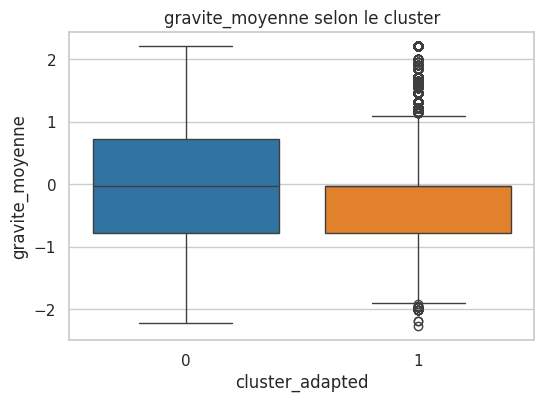

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


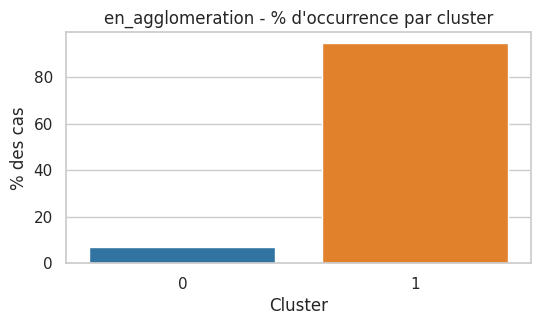

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


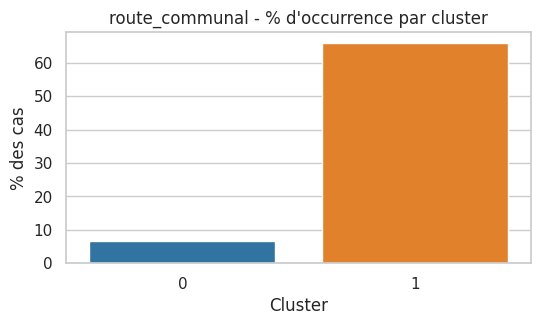

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


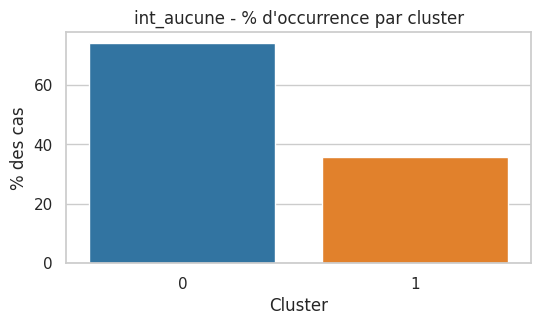

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


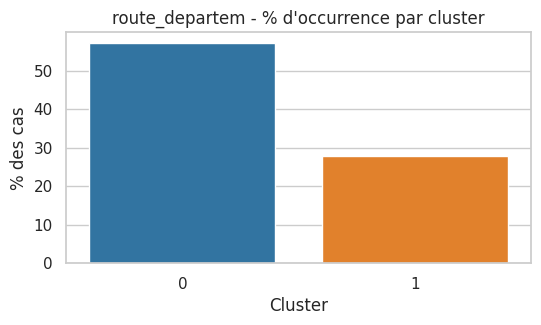

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


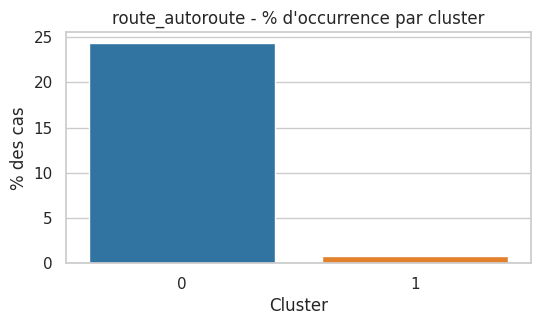

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


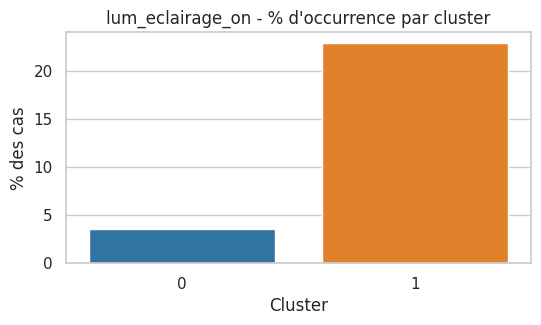

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


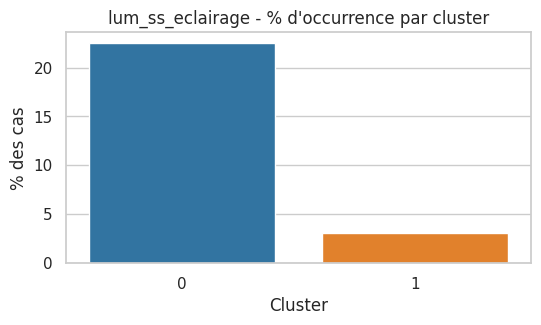

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


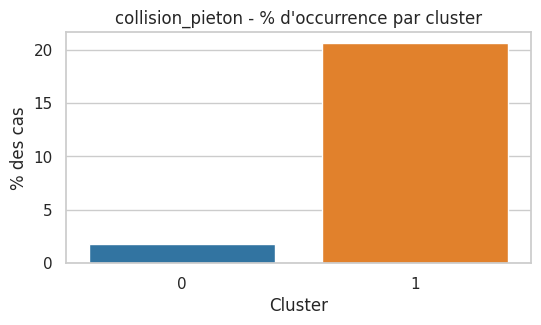

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


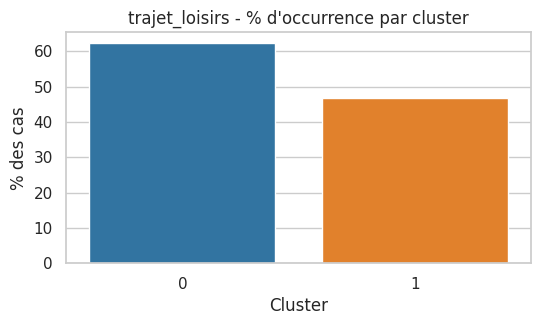

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


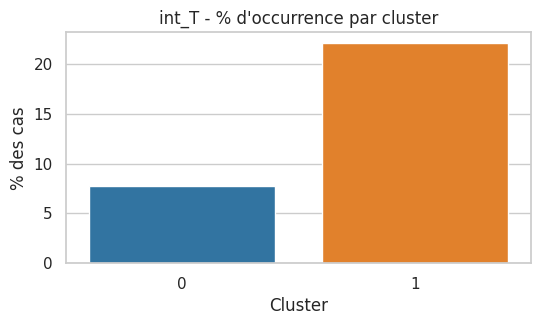

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


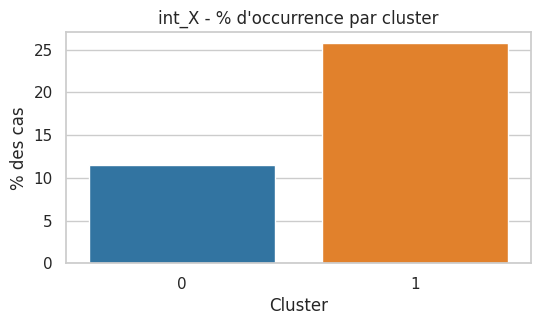

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


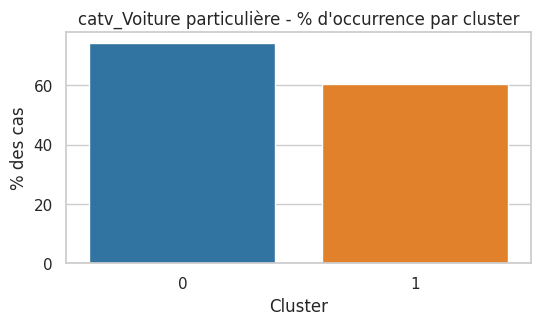

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


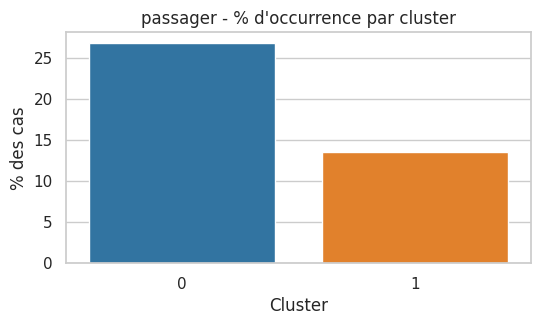

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


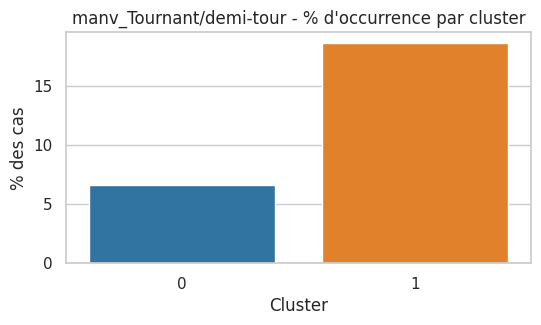

/tmp/ipython-input-2162588803.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary[var], palette='tab10')


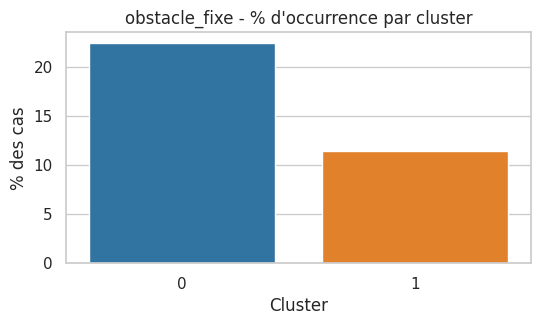

In [ ]:
# Moyennes pour les colonnes numériques
numeric_profile = df.groupby('cluster_adapted')[['vma', 'lat', 'long', 'age', 'gravite_moyenne']].mean()

# Pour les colonnes binaires : pourcentage de 1 (proportion de présence)
binary_profile = df.groupby('cluster_adapted')[bin_cols].mean() * 100  # en %

# Combiner dans un même tableau
summary = pd.concat([numeric_profile, binary_profile], axis=1)

# Trier les colonnes selon leur variance inter-cluster (les plus discriminantes en haut)
var_features = summary.var(axis=0).sort_values(ascending=False)
# top 15 variables qui différencient le plus les clusters
top_features = var_features.head(15).index

# Tableau résumé des top variables par cluster
display(summary[top_features].round(2))

# Sauvegarde du profil
summary.to_csv(url+"profil_clusters_kmeans_adapte.csv", index=True)

# 1. Boxplot pour les variables numériques
for col in ['vma', 'age', 'gravite_moyenne']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='cluster_adapted', y=col, palette='tab10')
    plt.title(f'{col} selon le cluster')
    plt.show()

# 2. Barplot pour les top variables binaires discriminantes
for var in top_features:
    if var in bin_cols:
        plt.figure(figsize=(6,3))
        sns.barplot(x=summary.index, y=summary[var], palette='tab10')
        plt.title(f"{var} - % d'occurrence par cluster")
        plt.ylabel('% des cas')
        plt.xlabel('Cluster')
        plt.show()

In [ ]:
# Récapitulatif synthétique
cluster_summary = summary.loc[:, top_features].round(2)
display(cluster_summary)


,en_agglomeration,route_communal,int_aucune,route_departem,route_autoroute,lum_eclairage_on,lum_ss_eclairage,collision_pieton,trajet_loisirs,int_T,int_X,catv_Voiture particulière,passager,manv_Tournant/demi-tour,obstacle_fixe
cluster_adapted,,,,,,,,,,,,,,,
0,6.90,6.68,74.08,57.10,24.31,3.52,22.48,1.78,62.29,7.73,11.49,74.24,26.84,6.65,22.46
1,94.47,65.87,35.71,27.71,0.84,22.88,3.13,20.60,46.83,22.06,25.75,60.56,13.53,18.64,11.49


## Méthodes spécialisées
K-modes ou K-prototypes
https://www.kaggle.com/code/taronzakaryan/clustering-with-k-prototypes
https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering#Using-K-Mode-with-%22Cao%22-initialization

# DBSCAN